# Plotting

In [1]:
import torch
from tqdm import tqdm
import numpy as np
from stable_baselines3 import DQN
import warnings
import pandas as pd
import gc  # Import garbage collector module

warnings.filterwarnings("ignore")

In [2]:
SEED = 12345
ENV_ID = 'SeaquestNoFrameskip-v4'
EPOCHS = 10
TRIALS = 5
EPOCHS_TO_CONTINUE = 10

In [3]:
# ensure the module is re-imported after changes
import importlib

import datasets.dataset_utils
importlib.reload(datasets.dataset_utils)

from datasets.dataset_utils import set_all_seeds, create_environment, check_dataset, save_dataset, load_dataset, preprocess_and_split, create_dataloaders, inspect_dataset_sample, analyze_action_distribution

import auxiliary_methods.utils
importlib.reload(auxiliary_methods.utils)

from auxiliary_methods.utils import load_iql_return_stats

In [4]:
# ensure the module is re-imported after changes
import importlib

import behavioral_cloning_bc.bc_utils
importlib.reload(behavioral_cloning_bc.bc_utils)

from behavioral_cloning_bc.bc_utils import train_and_evaluate_BC, continue_training_BC

import implicit_q_learning_iql.iql_utils
importlib.reload(implicit_q_learning_iql.iql_utils)

from implicit_q_learning_iql.iql_utils import train_and_evaluate_IQL, continue_training_IQL
#from implicit_q_learning_iql.iql_utils import plot_iql_losses_and_rewards
#from implicit_q_learning_iql.iql_utils import calculate_similarity
#from implicit_q_learning_iql.iql_utils import plot_q_value_similarity

import deep_q_network_dqn.dqn_utils
importlib.reload(deep_q_network_dqn.dqn_utils)

from deep_q_network_dqn.dqn_utils import train_and_evaluate_DQN , continue_training_DQN

In [5]:
# ensure the module is re-imported after changes
import importlib

import plotting.plot_dataset_statistics
importlib.reload(plotting.plot_dataset_statistics)

from plotting.plot_dataset_statistics import (
    plot_action_distribution,
    plot_perturbation_effects,
    visualize_perturbation_samples,
    plot_reward_distribution
)

In [6]:
# set seed for reproducability
set_all_seeds(SEED)

# force PyTorch to use CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [7]:
# initialize enviornment
env = create_environment(env_id=ENV_ID, seed=SEED)

In [22]:
import pickle
import matplotlib.pyplot as plt
import matplotlib

# Professional Matplotlib settings
matplotlib.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'grid.color': 'gray',
    'grid.linestyle': '--',
    'grid.alpha': 0.7
})

# Helper: load pickles
def load_pkl(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# Nice consistent color map
from matplotlib import cm
colors = cm.Blues(np.linspace(0.4, 1.0, 4))  # 4 shades of blue

# Paths for each model
model_paths = {
    'IQL': {
        0: 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_0/stats_0_continued.pkl',
        5: 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_5/stats_5_continued.pkl',
        10: 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        20: 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_20/stats_20_continued.pkl'
    },
    'DQN': {
        0: 'deep_q_network_dqn/dqn_logs/expert_dataset/perturbation_0/stats_0_continued.pkl',
        5: 'deep_q_network_dqn/dqn_logs/expert_dataset/perturbation_5/stats_5_continued.pkl',
        10: 'deep_q_network_dqn/dqn_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        20: 'deep_q_network_dqn/dqn_logs/expert_dataset/perturbation_20/stats_20_continued.pkl'
    },
    'BC': {
        0: 'behavioral_cloning_bc/bc_logs/expert_dataset/perturbation_0/stats_0_continued.pkl',
        5: 'behavioral_cloning_bc/bc_logs/expert_dataset/perturbation_5/stats_5_continued.pkl',
        10: 'behavioral_cloning_bc/bc_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        20: 'behavioral_cloning_bc/bc_logs/expert_dataset/perturbation_20/stats_20_continued.pkl'
    }
}


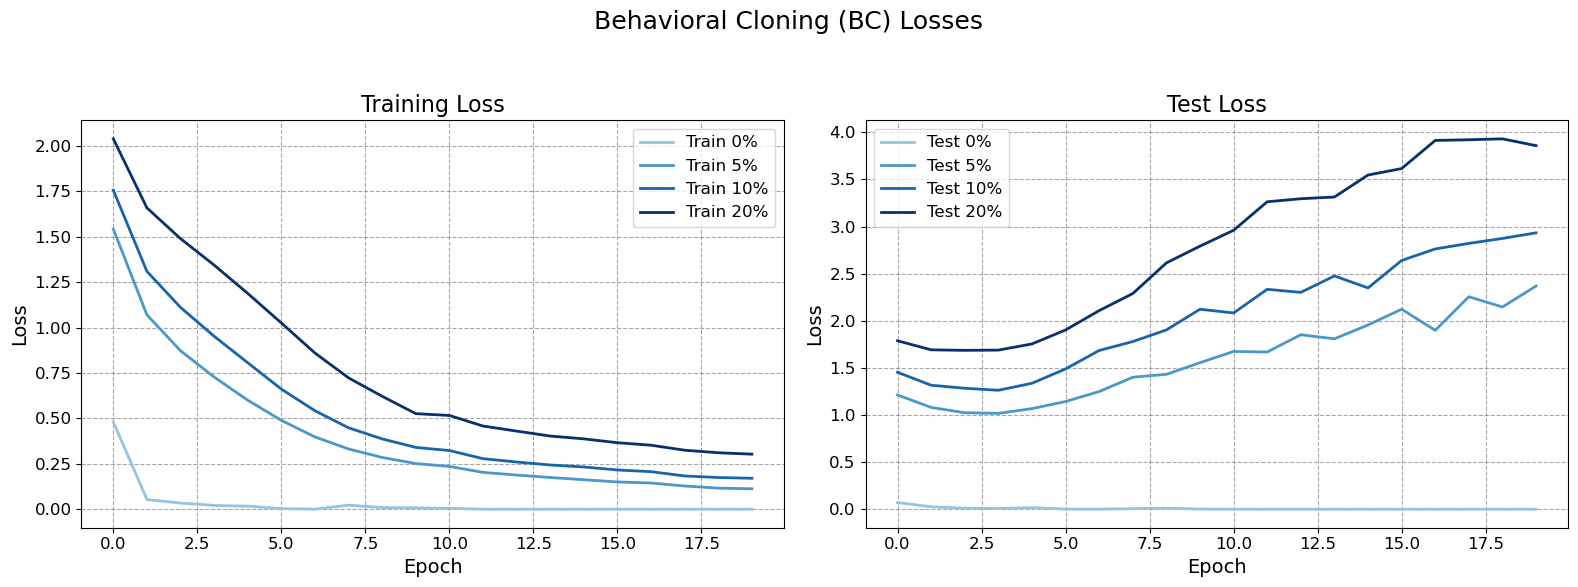

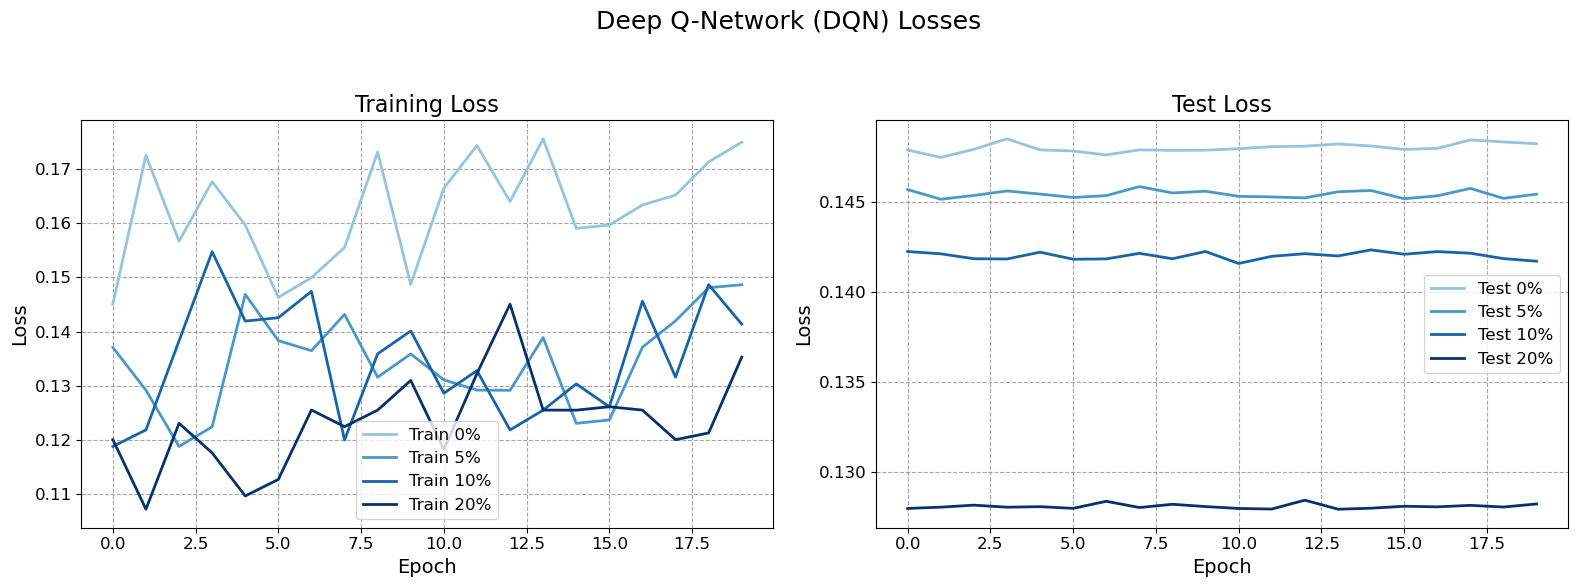

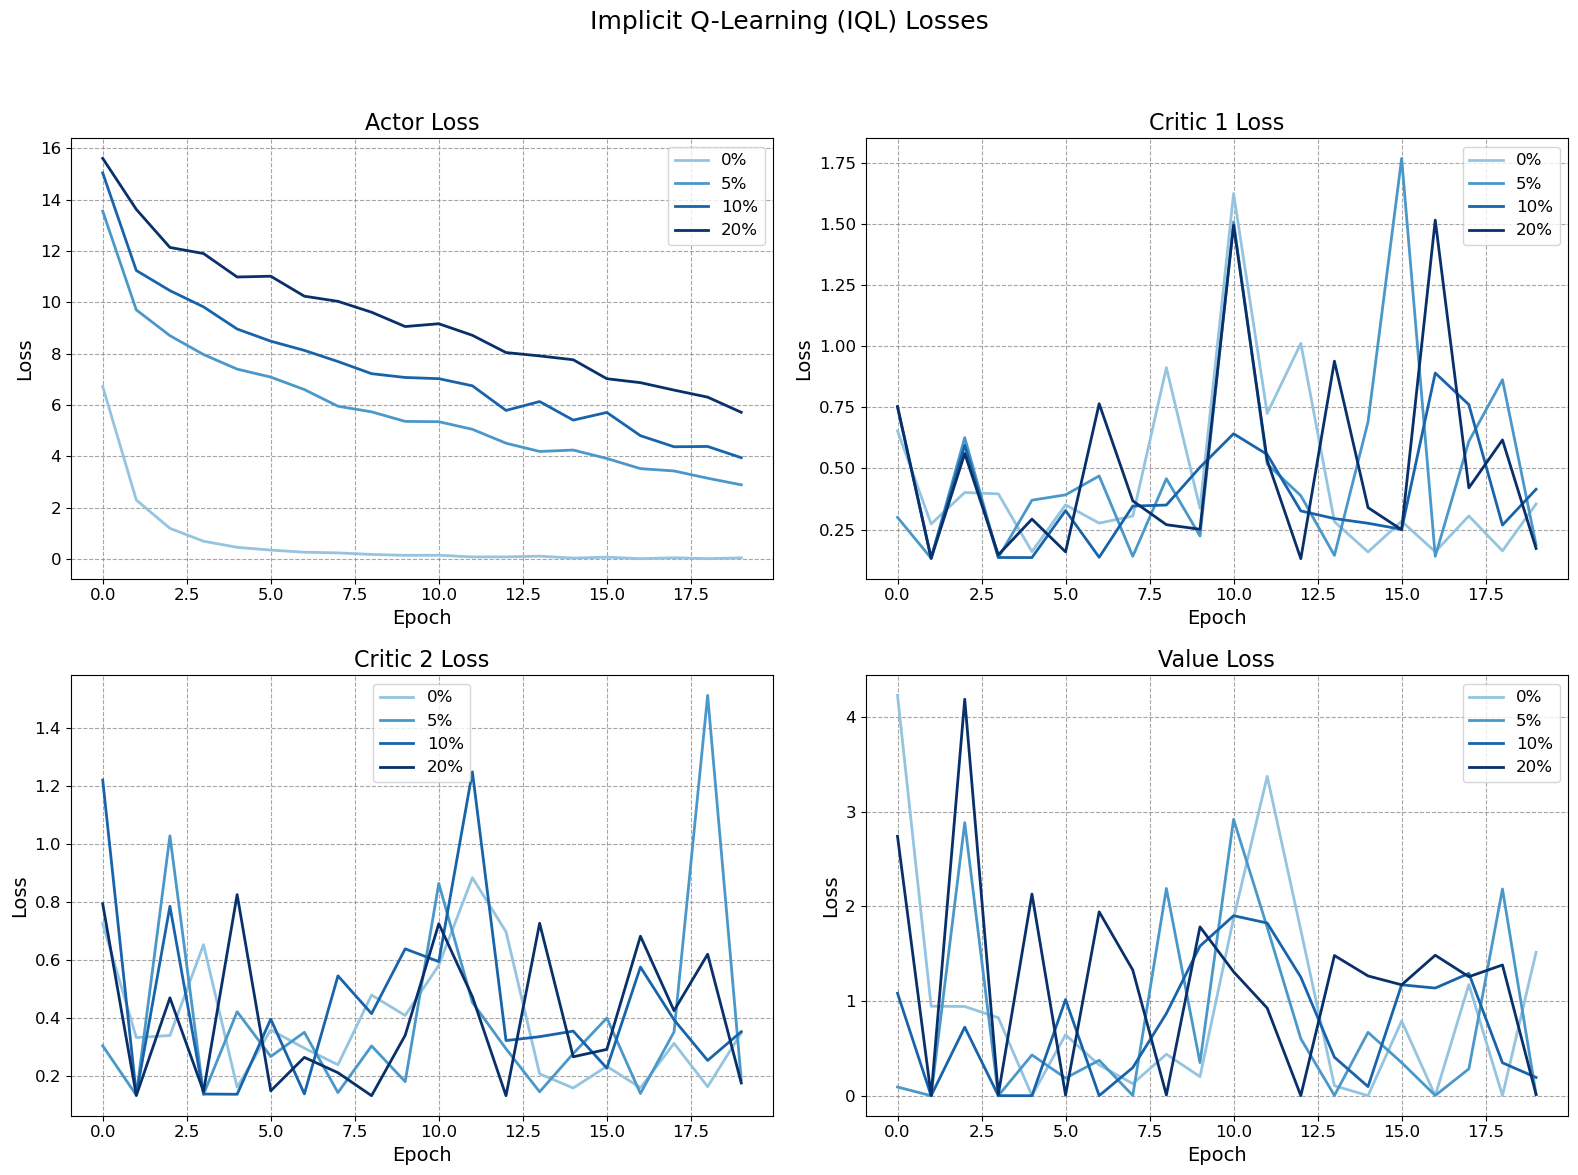

In [23]:

# --- BC Losses ---
def plot_bc_losses():
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Behavioral Cloning (BC) Losses', fontsize=18)

    for idx, (perturbation, path) in enumerate(model_paths['BC'].items()):
        stats = load_pkl(path)
        train_losses = stats['train_losses'][0]
        test_losses = stats['test_losses'][0]
        axs[0].plot(train_losses, label=f'Train {perturbation}%', color=colors[idx], linewidth=2)
        axs[1].plot(test_losses, label=f'Test {perturbation}%', color=colors[idx], linewidth=2)

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.grid(True)
        ax.legend(loc='best')

    axs[0].set_title('Training Loss')
    axs[1].set_title('Test Loss')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- DQN Losses ---
def plot_dqn_losses():
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Deep Q-Network (DQN) Losses', fontsize=18)

    for idx, (perturbation, path) in enumerate(model_paths['DQN'].items()):
        stats = load_pkl(path)
        train_losses = stats['train_losses'][0]
        test_losses = stats['test_losses'][0]
        axs[0].plot(train_losses, label=f'Train {perturbation}%', color=colors[idx], linewidth=2)
        axs[1].plot(test_losses, label=f'Test {perturbation}%', color=colors[idx], linewidth=2)

    for ax in axs:
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.grid(True)
        ax.legend(loc='best')

    axs[0].set_title('Training Loss')
    axs[1].set_title('Test Loss')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- IQL Losses ---
def plot_iql_losses_grid():
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Implicit Q-Learning (IQL) Losses', fontsize=18)

    iql_loss_keys = {
        'Actor Loss': 'actor_losses',
        'Critic 1 Loss': 'critic1_losses',
        'Critic 2 Loss': 'critic2_losses',
        'Value Loss': 'value_losses'
    }

    axs = axs.flatten()

    for idx, (loss_name, key) in enumerate(iql_loss_keys.items()):
        for jdx, (perturbation, path) in enumerate(model_paths['IQL'].items()):
            stats = load_pkl(path)
            losses = stats[key][0]
            axs[idx].plot(losses, label=f'{perturbation}%', color=colors[jdx], linewidth=2)

        axs[idx].set_title(loss_name)
        axs[idx].set_xlabel('Epoch')
        axs[idx].set_ylabel('Loss')
        axs[idx].grid(True)
        axs[idx].legend(loc='best')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Call the Plots ---
plot_bc_losses()
plot_dqn_losses()
plot_iql_losses_grid()


In [85]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# --- Helper ---
def load_pkl(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# --- Beautiful Plot ---
def plot_all_rewards_pretty(model_name, model_paths, smoothing_window=3):
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(f'{model_name} - Reward Curves (First Trial)', fontsize=18, fontweight='bold')

    perturbation_colors = {
        0: '#1f77b4',   # blue
        5: '#2ca02c',   # green
        10: '#ff7f0e',  # orange
        20: '#d62728',  # red
    }

    for perturbation, path in model_paths.items():
        stats = load_pkl(path)
        rewards_trials = stats['rewards']

        if len(rewards_trials) == 0:
            print(f"Warning: No trials for {perturbation}%")
            continue

        first_trial = rewards_trials[0]

        trial_flat = []
        if isinstance(first_trial, (list, np.ndarray)):
            for reward in first_trial:
                if isinstance(reward, (list, np.ndarray)):
                    trial_flat.append(float(np.mean(reward)))
                else:
                    trial_flat.append(float(reward))
        else:
            trial_flat.append(float(first_trial))
        
        rewards = np.array(trial_flat, dtype=np.float64)

        # --- Smooth with moving average ---
        if smoothing_window > 1:
            rewards = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='same')

        epochs = np.arange(len(rewards))
        ax.plot(
            epochs, rewards,
            label=f'{perturbation}% Perturbation',
            color=perturbation_colors[perturbation],
            linewidth=2.5,
            alpha=0.85
        )

    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Reward', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.minorticks_on()
    ax.legend(title='Perturbation Level', fontsize=13, title_fontsize=14, loc='lower right')
    plt.tight_layout()
    plt.show()


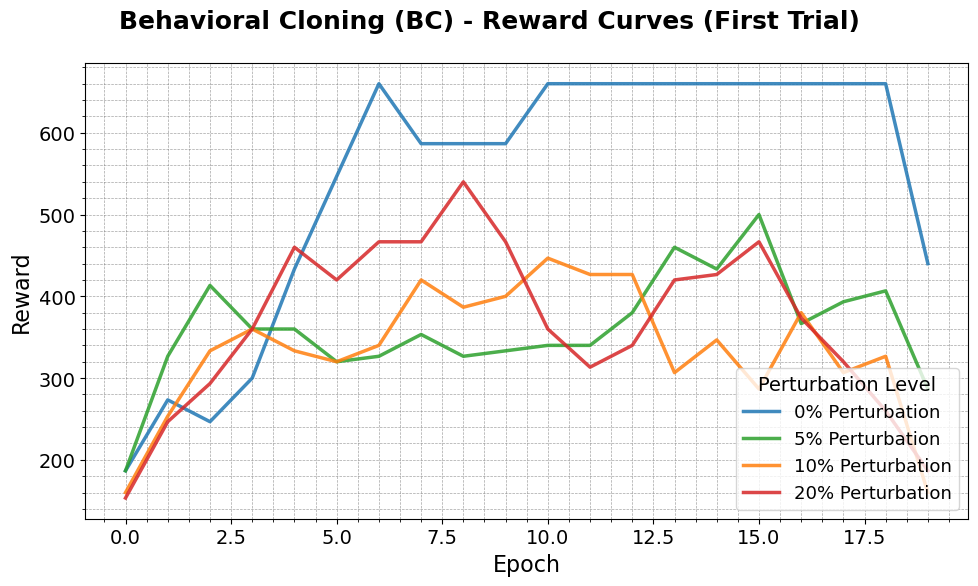

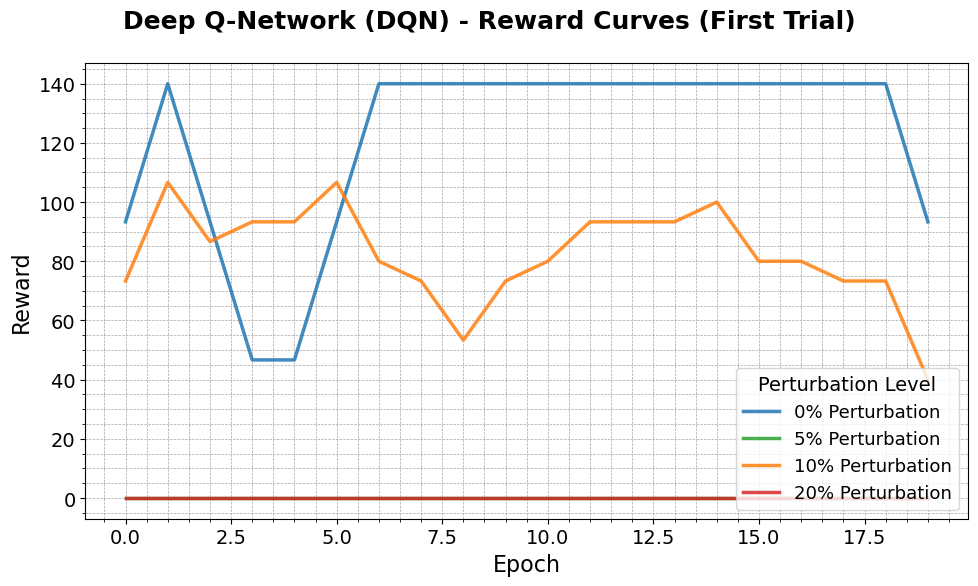

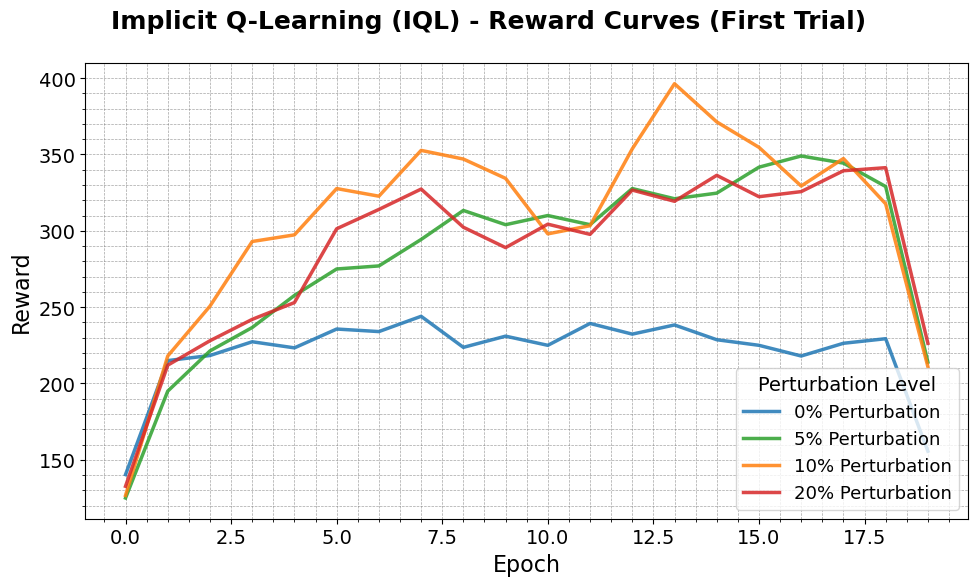

In [86]:
plot_all_rewards_pretty('Behavioral Cloning (BC)', model_paths['BC'])
plot_all_rewards_pretty('Deep Q-Network (DQN)', model_paths['DQN'])
plot_all_rewards_pretty('Implicit Q-Learning (IQL)', model_paths['IQL'])

In [87]:
import gymnasium as gym
import os
from gymnasium.wrappers import RecordVideo, RecordEpisodeStatistics

def create_env(seed, env_id='Seaquest-v4', capture_video=False, video_dir=None):
    """
    Create an environment, optionally recording video if capture_video is True.
    """
    env = gym.make(env_id, render_mode='rgb_array')

    if capture_video and video_dir is not None:
        os.makedirs(video_dir, exist_ok=True)
        env = RecordVideo(env, video_dir=video_dir, episode_trigger=lambda episode_id: True)

    env = RecordEpisodeStatistics(env)

    env.reset(seed=seed)
    env.action_space.seed(seed)
    env.observation_space.seed(seed)

    return env, env.action_space.n

import torch
import numpy as np
from tqdm import tqdm

def evaluate_saved_model(model_class, model_path, device, env_id='Seaquest-v4', n_episodes=100, max_steps=5000, seed=12345):
    """
    Load a saved model and evaluate it in the environment.
    """
    env, action_dim = create_env(seed, env_id, capture_video=False)

    model = model_class(action_dim, device=device, global_seed=seed, trial_idx=0)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    rewards = []

    for episode in tqdm(range(n_episodes), leave=False):
        obs, _ = env.reset(seed=seed + episode)
        done = False
        total_reward = 0
        steps = 0

        while not done and steps < max_steps:
            with torch.no_grad():
                state = torch.tensor(obs, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0).to(device) / 255.0
                action = model.get_action(state, eval=True).squeeze().item()

            obs, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            steps += 1

            torch.cuda.empty_cache()

        rewards.append(total_reward)

    env.close()
    return np.array(rewards)

import matplotlib.pyplot as plt

def plot_evaluation_rewards(rewards, title='Reward Curve', window=10):
    episodes = np.arange(len(rewards))

    # Smooth using moving average
    rewards_smoothed = np.convolve(rewards, np.ones(window) / window, mode='valid')

    # Compute moving standard deviation
    rewards_std = np.array([
        np.std(rewards[max(0, i-window):i+1]) for i in range(len(rewards_smoothed))
    ])

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(
        episodes[:len(rewards_smoothed)], 
        rewards_smoothed, 
        color='#1f77b4', 
        linewidth=2.5, 
        label='Mean Reward'
    )

    ax.fill_between(
        episodes[:len(rewards_smoothed)],
        rewards_smoothed - rewards_std,
        rewards_smoothed + rewards_std,
        color='#1f77b4',
        alpha=0.25,
        label='Std Deviation'
    )

    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel('Episode', fontsize=14)
    ax.set_ylabel('Reward', fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.7)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


In [ ]:
from implicit_q_learning_iql.iql_model import IQLModel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_path = 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_0/iql_model_0_continued.pth'
env_id = 'SeaquestNoFrameskip-v4'

rewards = evaluate_saved_model(IQLModel, model_path, device, env_id, n_episodes=100)

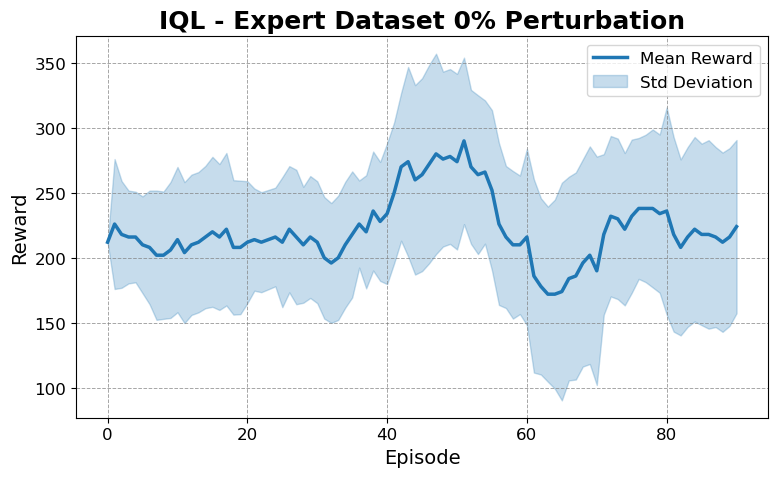

In [88]:

plot_evaluation_rewards(rewards, title='IQL - Expert Dataset 0% Perturbation')


In [89]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# --- Helper to load ---
def load_pkl(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# --- Universal Multi-Model Plot ---
def plot_selected_rewards_curves(model_specs, title='Model Comparison', smoothing_window=3):
    """
    model_specs: list of dicts, each dict containing:
        - 'label': label to show (e.g., "IQL 0%")
        - 'path': path to .pkl stats file
        - 'color': matplotlib color code (optional)
    """

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.suptitle(title, fontsize=18, fontweight='bold')

    for spec in model_specs:
        label = spec['label']
        path = spec['path']
        color = spec.get('color', None)  # optional

        stats = load_pkl(path)
        rewards_trials = stats['rewards']

        if len(rewards_trials) == 0:
            print(f"Warning: No trials found for {label}")
            continue

        first_trial = rewards_trials[0]

        trial_flat = []
        if isinstance(first_trial, (list, np.ndarray)):
            for reward in first_trial:
                if isinstance(reward, (list, np.ndarray)):
                    trial_flat.append(float(np.mean(reward)))
                else:
                    trial_flat.append(float(reward))
        else:
            trial_flat.append(float(first_trial))
        
        rewards = np.array(trial_flat, dtype=np.float64)

        # Smooth if requested
        if smoothing_window > 1:
            rewards = np.convolve(rewards, np.ones(smoothing_window)/smoothing_window, mode='same')

        epochs = np.arange(len(rewards))

        ax.plot(
            epochs, rewards,
            label=label,
            linewidth=2.5,
            alpha=0.85,
            color=color  # if color is None, matplotlib will pick one
        )

    ax.set_xlabel('Epoch', fontsize=16)
    ax.set_ylabel('Reward', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, which='both', linestyle='--', linewidth=0.6)
    ax.minorticks_on()
    ax.legend(fontsize=13)
    plt.tight_layout()
    plt.show()


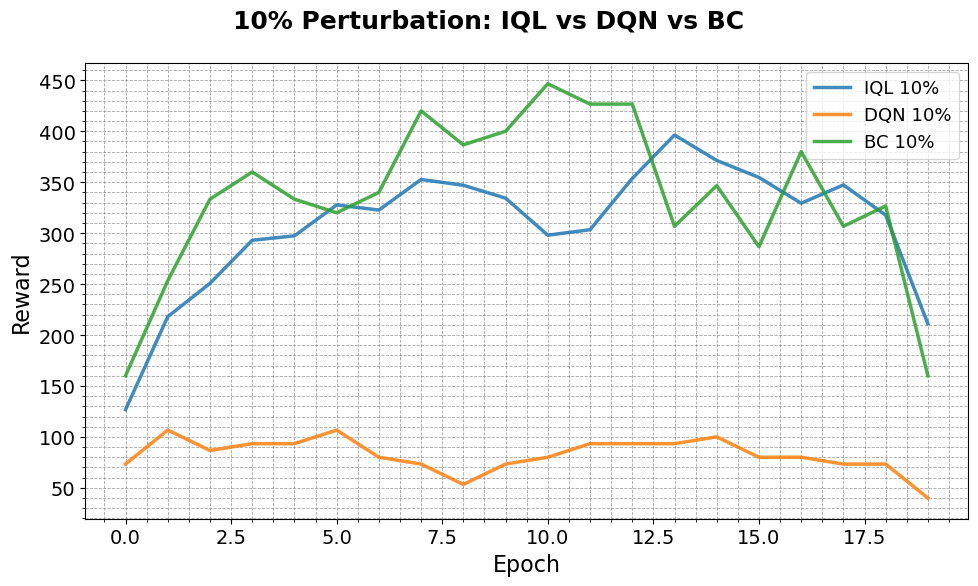

In [93]:
plot_selected_rewards_curves([
    {
        'label': 'IQL 10%',
        'path': 'implicit_q_learning_iql/iql_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        'color': '#1f77b4'  # blue
    },
    {
        'label': 'DQN 10%',
        'path': 'deep_q_network_dqn/dqn_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        'color': '#ff7f0e'  # orange
    },
    {
        'label': 'BC 10%',
        'path': 'behavioral_cloning_bc/bc_logs/expert_dataset/perturbation_10/stats_10_continued.pkl',
        'color': '#2ca02c'  # green
    }
], title='10% Perturbation: IQL vs DQN vs BC')


In [104]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load dataset ---
def load_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# --- Plot Beautiful Dataset ---
def plot_action_distribution(dataset_path, title='Action Distribution', normalize=False):
    dataset = load_dataset(dataset_path)

    actions = []
    perturbed_flags = []

    for transition in dataset:
        if len(transition) == 6:
            obs, action, reward, next_obs, done, perturbed = transition
        else:
            obs, action, reward, next_obs, done = transition
            perturbed = False
        actions.append(action)
        perturbed_flags.append(perturbed)

    actions = np.array(actions)
    perturbed_flags = np.array(perturbed_flags)

    all_actions = np.arange(np.max(actions)+1)

    normal_counts = [(~perturbed_flags & (actions == a)).sum() for a in all_actions]
    perturbed_counts = [(perturbed_flags & (actions == a)).sum() for a in all_actions]

    total_counts = np.array(normal_counts) + np.array(perturbed_counts)

    # --- Plotting ---
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(12,6))

    width = 0.6

    if normalize:
        normal_counts = np.array(normal_counts) / np.sum(total_counts)
        perturbed_counts = np.array(perturbed_counts) / np.sum(total_counts)
        ylabel = 'Frequency'
    else:
        ylabel = 'Count'

    ax.bar(all_actions, normal_counts, width=width, label='Normal', color='#4C72B0')
    ax.bar(all_actions, perturbed_counts, width=width, bottom=normal_counts, label='Perturbed', color='#DD8452')

    # Annotate bars if not normalized
    if not normalize:
        for idx, (norm, pert) in enumerate(zip(normal_counts, perturbed_counts)):
            total = norm + pert
            if total > 0:
                ax.text(idx, total + max(total_counts)*0.01, f"{int(total)}", ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Action ID', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xticks(all_actions)
    ax.set_xticklabels(all_actions, fontsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.legend(fontsize=13, title='Action Type', title_fontsize=14)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()


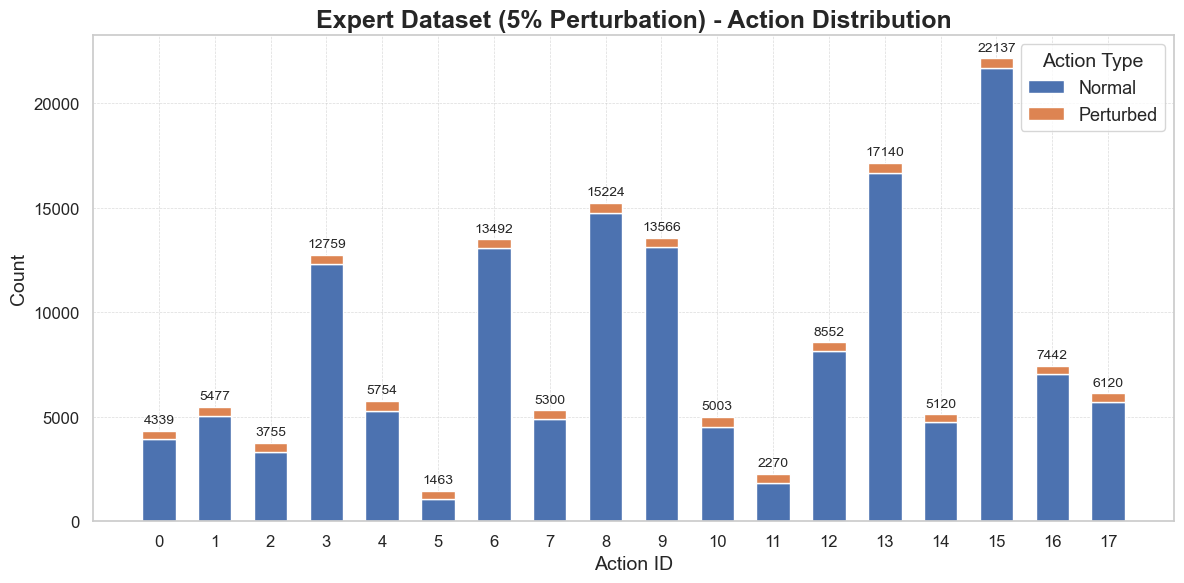

In [107]:
plot_action_distribution(
    dataset_path='datasets/expert/expert_logs/plotting\expert_dataset_perturbation_5_for_plotting.pkl',
    title='Expert Dataset (5% Perturbation) - Action Distribution',
    normalize=False
)


In [108]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Helper to load datasets
def load_plotting_dataset(path):
    with open(path, 'rb') as f:
        dataset = pickle.load(f)
    return dataset

# Main plotting function
def plot_multiple_datasets_comparison(dataset_paths, title='Action Distribution Comparison', normalize=False):
    """
    dataset_paths: dict mapping perturbation % -> dataset path
    """
    action_counts_per_dataset = {}
    all_action_ids = set()

    # Load and process each dataset
    for perturbation, path in dataset_paths.items():
        dataset = load_plotting_dataset(path)

        # Check if dataset has perturbation info
        if isinstance(dataset[0], tuple) and len(dataset[0]) == 6:
            actions = [transition[1] for transition in dataset if not transition[5]]  # only normal actions
        else:
            actions = [transition[1] for transition in dataset]  # assume normal

        unique, counts = np.unique(actions, return_counts=True)
        action_counts_per_dataset[perturbation] = dict(zip(unique, counts))
        all_action_ids.update(unique)

    all_action_ids = sorted(list(all_action_ids))
    n_actions = len(all_action_ids)

    # Prepare bar positions
    n_perturbations = len(dataset_paths)
    bar_width = 0.8 / n_perturbations  # shrink bars a bit
    x = np.arange(n_actions)

    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle(title, fontsize=18, fontweight='bold')

    colors = cm.get_cmap('tab10', n_perturbations)

    for idx, (perturbation, counts_dict) in enumerate(sorted(dataset_paths.items())):
        counts = [action_counts_per_dataset[perturbation].get(action_id, 0) for action_id in all_action_ids]
        counts = np.array(counts)

        if normalize:
            counts = counts / counts.sum()

        ax.bar(
            x + idx * bar_width,
            counts,
            width=bar_width,
            label=f'{perturbation}% Perturbation',
            color=colors(idx),
            alpha=0.85,
            edgecolor='black'
        )

    ax.set_xlabel('Action ID', fontsize=16)
    ax.set_ylabel('Normalized Frequency' if normalize else 'Count', fontsize=16)
    ax.set_xticks(x + bar_width * (n_perturbations - 1) / 2)
    ax.set_xticklabels(all_action_ids)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
    ax.legend(title='Perturbation Level', fontsize=12, title_fontsize=13)
    plt.tight_layout()
    plt.show()



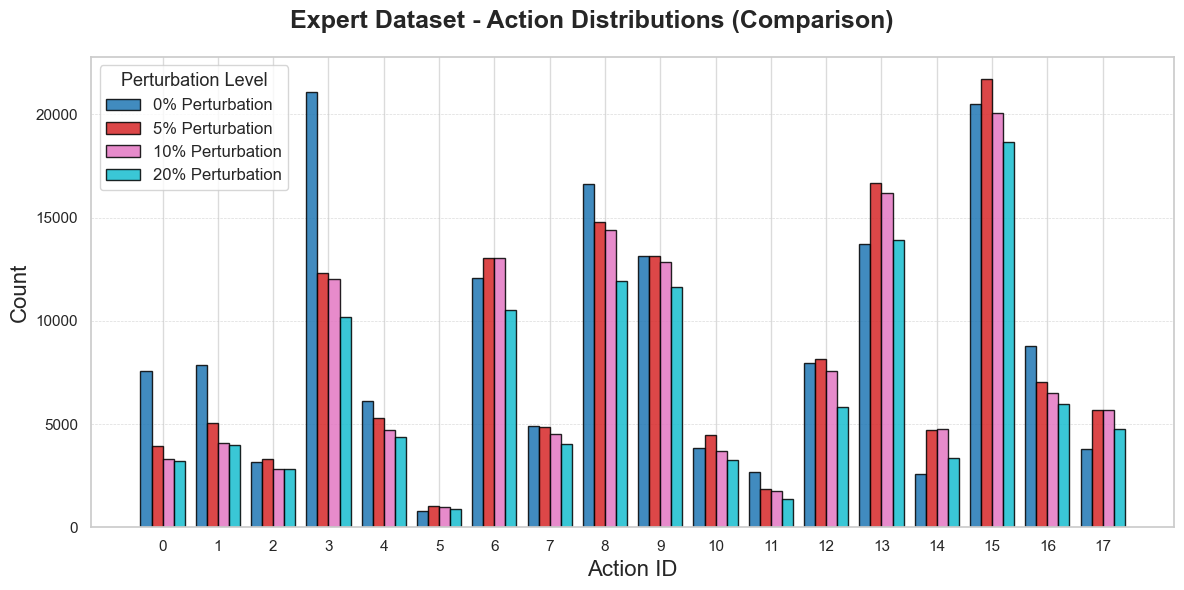

In [109]:
# Paths to your plotting datasets
dataset_paths = {
    0: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_0_for_plotting.pkl',
    5: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_5_for_plotting.pkl',
    10: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_10_for_plotting.pkl',
    20: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_20_for_plotting.pkl',
}

plot_multiple_datasets_comparison(
    dataset_paths,
    title='Expert Dataset - Action Distributions (Comparison)',
    normalize=False  # or True for percentage-style
)


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Dataset ---
def load_dataset_for_plotting(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# --- Plot Clean Stacked Bars Without Gaps ---
def plot_multiple_datasets_clean_stacked_final(dataset_paths, title='Action Frequencies Comparison', normalize=False):
    """
    dataset_paths: dict mapping perturbation level (0,5,10,20) -> path
    """
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(14,7))
    fig.suptitle(title, fontsize=20, fontweight='bold')

    colors = sns.color_palette('tab10', n_colors=len(dataset_paths))

    action_id_set = set()
    dataset_info = {}

    # --- Load and preprocess datasets ---
    for idx, (perturbation, path) in enumerate(sorted(dataset_paths.items())):
        dataset = load_dataset_for_plotting(path)

        actions = []
        perturbed_flags = []

        for transition in dataset:
            if len(transition) == 6:
                _, action, _, _, _, perturbed = transition
            else:
                _, action, _, _, _ = transition
                perturbed = False
            actions.append(action)
            perturbed_flags.append(perturbed)

        actions = np.array(actions)
        perturbed_flags = np.array(perturbed_flags)

        unique_actions = np.unique(actions)
        action_id_set.update(unique_actions)

        normal_counts = [(~perturbed_flags & (actions == a)).sum() for a in unique_actions]
        perturbed_counts = [(perturbed_flags & (actions == a)).sum() for a in unique_actions]

        dataset_info[perturbation] = {
            'actions': unique_actions,
            'normal': np.array(normal_counts),
            'perturbed': np.array(perturbed_counts)
        }

    all_action_ids = sorted(list(action_id_set))
    n_actions = len(all_action_ids)

    bar_width = 0.7 / len(dataset_paths)  # narrower bars per dataset

    handles = []
    labels = []

    # --- Plot each perturbation level ---
    for idx, (perturbation, data) in enumerate(dataset_info.items()):
        x_offsets = np.arange(n_actions) + (idx - (len(dataset_paths)-1)/2) * bar_width

        normal_heights = np.zeros(n_actions)
        perturbed_heights = np.zeros(n_actions)

        for j, action_id in enumerate(all_action_ids):
            if action_id in data['actions']:
                pos = list(data['actions']).index(action_id)
                normal_heights[j] = data['normal'][pos]
                perturbed_heights[j] = data['perturbed'][pos]

        if normalize:
            total = normal_heights + perturbed_heights
            total[total == 0] = 1  # avoid division by zero
            normal_heights /= total
            perturbed_heights /= total

        bars_normal = ax.bar(
            x_offsets,
            normal_heights,
            width=bar_width,
            color=colors[idx],
            edgecolor='black',
            label=f'{perturbation}% Perturbation'
        )

        bars_perturbed = ax.bar(
            x_offsets,
            perturbed_heights,
            width=bar_width,
            bottom=normal_heights,
            color=colors[idx],
            alpha=0.4,
            edgecolor='black'
        )

        for bar in bars_perturbed:
            if bar.get_height() > 0:
                bar_center = bar.get_x() + bar.get_width() / 0.9
                bar_top = bar.get_y() + bar.get_height()
                ax.text(
                    bar_center,
                    bar_top + 0.025 * ax.get_ylim()[1],  # fixed small offset, stable no matter bar size # change 0.05 here todo
                    f'{int(bar.get_height())}',
                    ha='center',
                    va='bottom',
                    fontsize=7,
                    rotation=90,
                    rotation_mode='anchor'  # anchors rotation exactly at text bottom center
                )

        # Save normal bar handle for legend (only once)
        handles.append(bars_normal[0])
        labels.append(f'{perturbation}%')

    # --- Final Polishing ---
    ax.set_xlabel('Action ID', fontsize=16)
    ax.set_ylabel('Normalized Frequency' if normalize else 'Count', fontsize=16)
    ax.set_xticks(np.arange(n_actions))
    ax.set_xticklabels(all_action_ids, fontsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')

    # Only normal counts in legend
    ax.legend(handles=handles, labels=labels, title='Perturbation Level', title_fontsize=14, fontsize=12, loc='upper right')

    plt.tight_layout()
    plt.show()


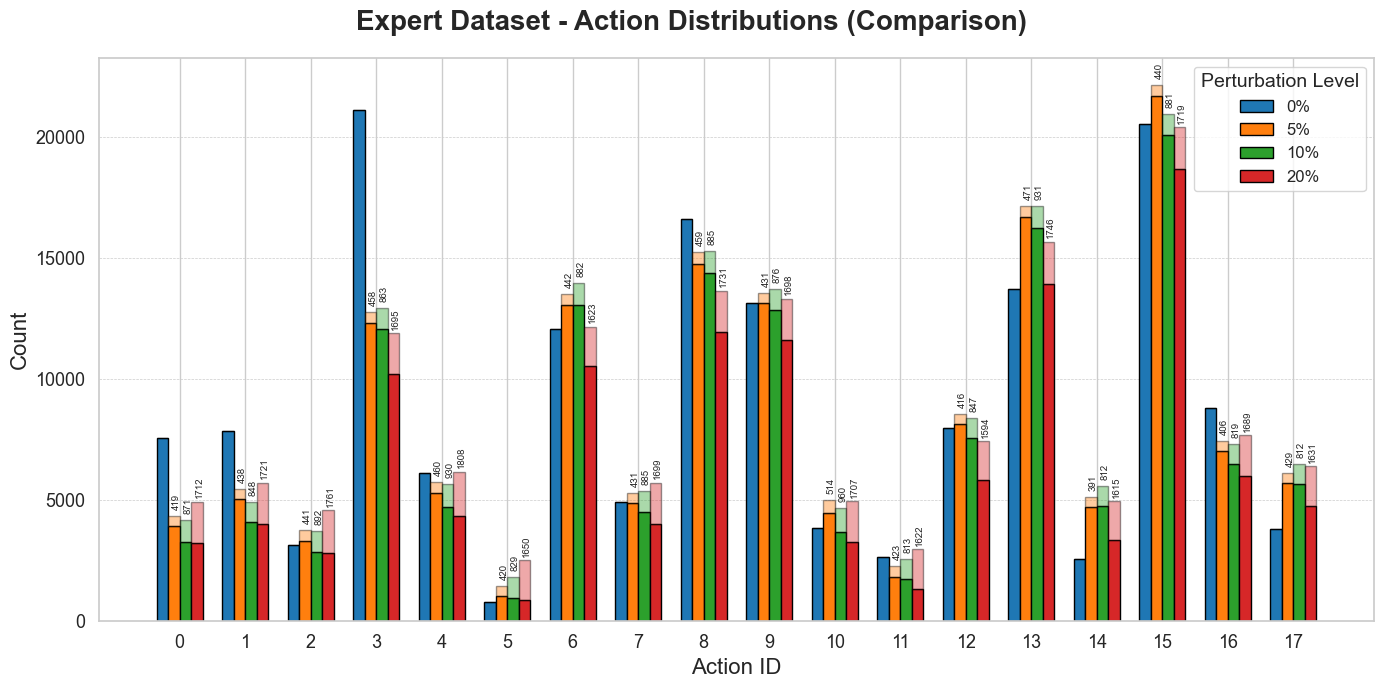

In [2]:
# Paths to your plotting datasets
dataset_paths = {
    0: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_0_for_plotting.pkl',
    5: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_5_for_plotting.pkl',
    10: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_10_for_plotting.pkl',
    20: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_20_for_plotting.pkl',
}

plot_multiple_datasets_clean_stacked_final(
    dataset_paths,
    title='Expert Dataset - Action Distributions (Comparison)',
    normalize=False  # or True for percentage-style
)


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_plotting_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

def plot_perturbation_heatmap(dataset_paths, normalize=True, cmap='Blues'):
    """
    dataset_paths: dict mapping perturbation % -> dataset path
    normalize: if True, shows percentages instead of counts
    """
    all_actions = list(range(18))  # Action IDs (0 to 17)
    perturbation_levels = sorted(dataset_paths.keys())

    heatmap_data = np.zeros((len(perturbation_levels), len(all_actions)))

    for p_idx, perturbation in enumerate(perturbation_levels):
        dataset = load_plotting_dataset(dataset_paths[perturbation])

        perturbed_actions = []
        total_actions = []

        for transition in dataset:
            if len(transition) == 6:
                _, action, _, _, _, perturbed = transition
            else:
                _, action, _, _, _ = transition
                perturbed = False

            total_actions.append(action)
            if perturbed:
                perturbed_actions.append(action)

        total_actions = np.array(total_actions)
        perturbed_actions = np.array(perturbed_actions)

        for a_idx, action_id in enumerate(all_actions):
            total_count = np.sum(total_actions == action_id)
            perturbed_count = np.sum(perturbed_actions == action_id)

            if normalize:
                heatmap_data[p_idx, a_idx] = perturbed_count / total_count if total_count > 0 else 0
            else:
                heatmap_data[p_idx, a_idx] = perturbed_count

    # --- Plot heatmap ---
    plt.figure(figsize=(14, 6))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f" if normalize else "d",
        cmap=cmap,
        xticklabels=all_actions,
        yticklabels=[f"{p}%" for p in perturbation_levels],
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={'label': 'Perturbation %' if normalize else 'Perturbed Count'}
    )

    plt.title('Perturbation Heatmap per Action and Perturbation Level', fontsize=18, fontweight='bold')
    plt.xlabel('Action ID', fontsize=16)
    plt.ylabel('Perturbation Level', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


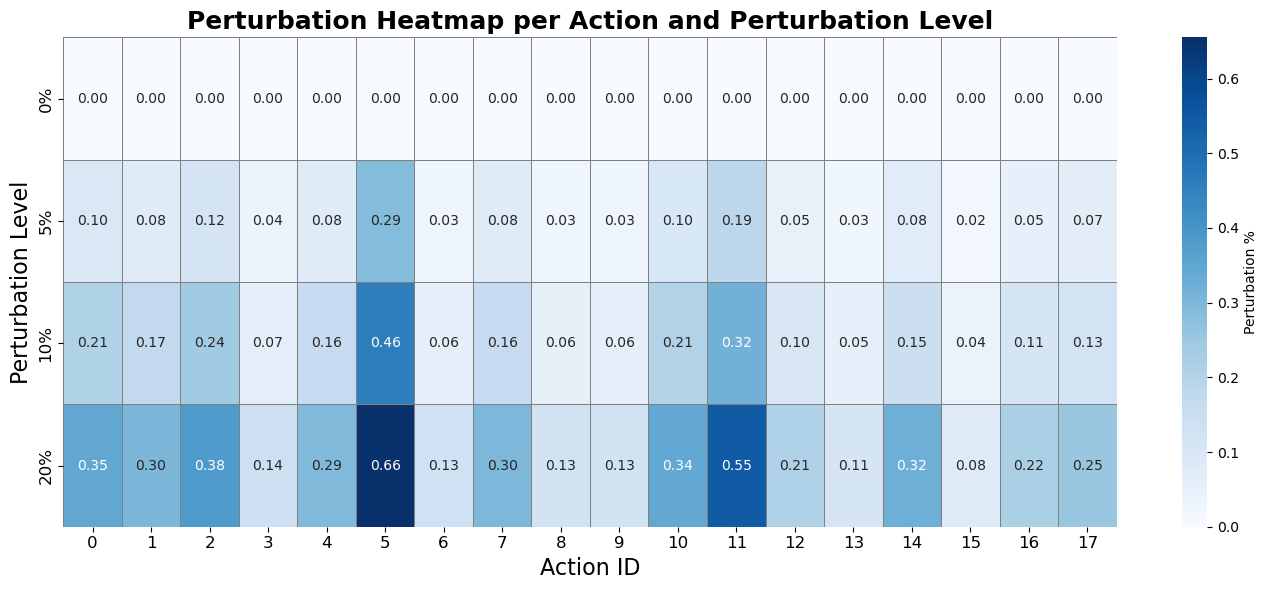

In [2]:
plot_perturbation_heatmap(
    dataset_paths = {
        0: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_0_for_plotting.pkl',
        5: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_5_for_plotting.pkl',
        10: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_10_for_plotting.pkl',
        20: 'datasets/expert/expert_logs/plotting\expert_dataset_perturbation_20_for_plotting.pkl',
    },
    normalize=True, # True for percentage, False for counts
    cmap='Blues'
)

In [1]:
# Re-import libraries after kernel reset
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# Reload function
def load_dataset_for_plotting(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# New function: compare dataset types (e.g., expert, mixed, replay) for one perturbation level
def plot_datasets_comparison_across_types(dataset_paths, title='Action Distributions Across Dataset Types', normalize=False):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(figsize=(14, 7))
    fig.suptitle(title, fontsize=20, fontweight='bold')

    colors = sns.color_palette('tab10', n_colors=len(dataset_paths))
    action_id_set = set()
    dataset_info = {}

    # Load all datasets
    for idx, (dataset_type, path) in enumerate(dataset_paths.items()):
        dataset = load_dataset_for_plotting(path)
        actions = []
        perturbed_flags = []

        for transition in dataset:
            if len(transition) == 6:
                _, action, _, _, _, perturbed = transition
            else:
                _, action, _, _, _ = transition
                perturbed = False
            actions.append(action)
            perturbed_flags.append(perturbed)

        actions = np.array(actions)
        perturbed_flags = np.array(perturbed_flags)
        unique_actions = np.unique(actions)
        action_id_set.update(unique_actions)

        normal_counts = [(~perturbed_flags & (actions == a)).sum() for a in unique_actions]
        perturbed_counts = [(perturbed_flags & (actions == a)).sum() for a in unique_actions]

        dataset_info[dataset_type] = {
            'actions': unique_actions,
            'normal': np.array(normal_counts),
            'perturbed': np.array(perturbed_counts)
        }

    all_action_ids = sorted(list(action_id_set))
    n_actions = len(all_action_ids)
    bar_width = 0.7 / len(dataset_paths)
    handles, labels = [], []

    for idx, (dataset_type, data) in enumerate(dataset_info.items()):
        x_offsets = np.arange(n_actions) + (idx - (len(dataset_paths) - 1) / 2) * bar_width
        normal_heights = np.zeros(n_actions)
        perturbed_heights = np.zeros(n_actions)

        for j, action_id in enumerate(all_action_ids):
            if action_id in data['actions']:
                pos = list(data['actions']).index(action_id)
                normal_heights[j] = data['normal'][pos]
                perturbed_heights[j] = data['perturbed'][pos]

        if normalize:
            total = normal_heights + perturbed_heights
            total[total == 0] = 1
            normal_heights /= total
            perturbed_heights /= total

        bars_normal = ax.bar(
            x_offsets,
            normal_heights,
            width=bar_width,
            color=colors[idx],
            edgecolor='black',
            label=f'{dataset_type}'
        )

        bars_perturbed = ax.bar(
            x_offsets,
            perturbed_heights,
            width=bar_width,
            bottom=normal_heights,
            color=colors[idx],
            alpha=0.4,
            edgecolor='black'
        )

        for bar in bars_perturbed:
            if bar.get_height() > 0:
                bar_center = bar.get_x() + bar.get_width() / 1
                bar_top = bar.get_y() + bar.get_height()
                ax.text(
                    bar_center,
                    bar_top + 0.025 * ax.get_ylim()[1],
                    f'{int(bar.get_height())}' if not normalize else f'{bar.get_height():.2f}',
                    ha='center',
                    va='bottom',
                    fontsize=7,
                    rotation=90,
                    rotation_mode='anchor'
                )

        handles.append(bars_normal[0])
        labels.append(dataset_type)

    # Add space above tallest bar
    max_height = 0
    for container in ax.containers:
        for bar in container:
            height = bar.get_y() + bar.get_height()
            if height > max_height:
                max_height = height
    ax.set_ylim(top=1.05 * max_height)  # Add 5% space above tallest bar


    ax.set_xlabel('Action ID', fontsize=16)
    ax.set_ylabel('Normalized Frequency' if normalize else 'Count', fontsize=16)
    ax.set_xticks(np.arange(n_actions))
    ax.set_xticklabels(all_action_ids, fontsize=13)
    ax.tick_params(axis='y', labelsize=13)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
    ax.legend(handles=handles, labels=labels, title='Dataset Type', title_fontsize=14, fontsize=12, loc='upper right')
    plt.tight_layout()
    plt.show()


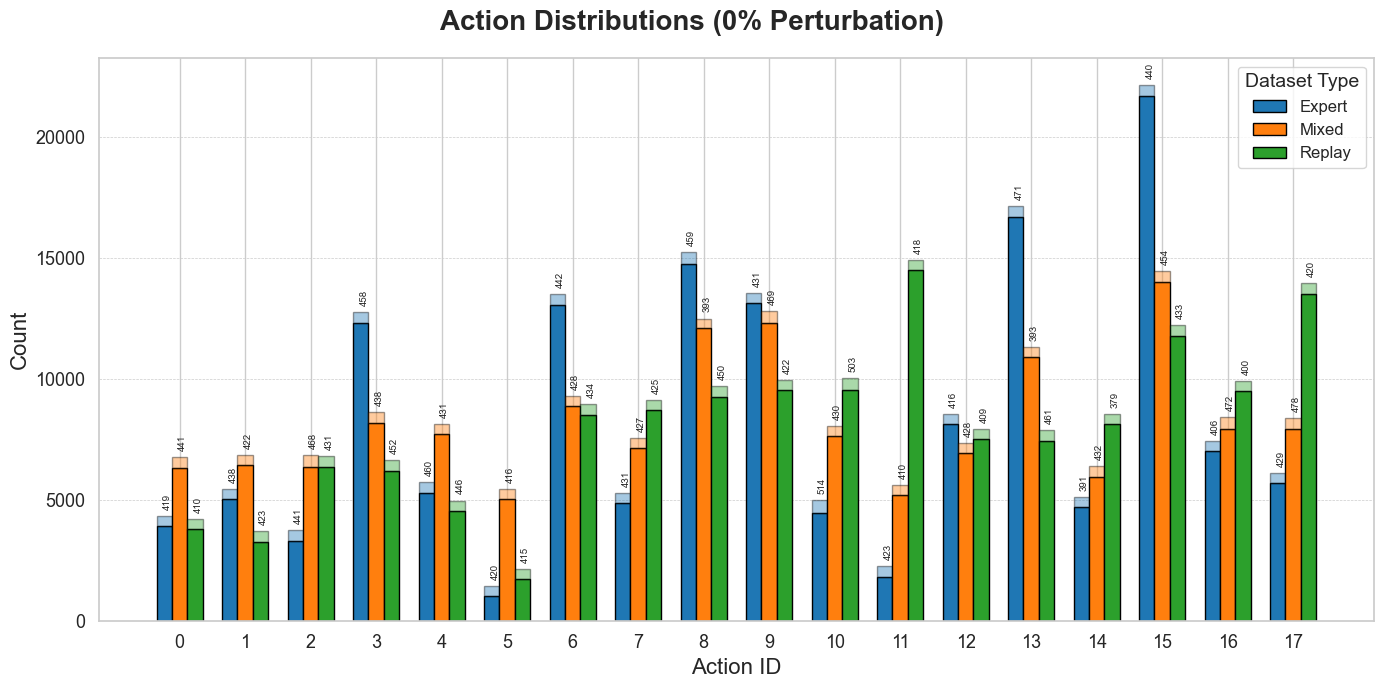

In [2]:
plot_datasets_comparison_across_types({
    'Expert': 'datasets/expert/expert_logs/plotting/expert_dataset_perturbation_5_for_plotting.pkl',
    'Mixed': 'datasets/mixed/mixed_logs/plotting/mixed_dataset_perturbation_5_for_plotting.pkl',
    'Replay': 'datasets/replay/replay_logs/plotting/replay_dataset_perturbation_5_for_plotting.pkl'
}, title='Action Distributions (0% Perturbation)')

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from collections import defaultdict
from typing import List


def load_plotting_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)


# 1. Action Usage Over Time
def plot_action_usage_over_time(dataset_path: str, title: str = "Action Usage Over Time", max_steps: int = 500):
    dataset = load_plotting_dataset(dataset_path)

    time_action_counts = defaultdict(lambda: np.zeros(18, dtype=int))  # 18 Seaquest actions

    step_counter = 0
    for transition in dataset:
        if len(transition) == 6:
            _, action, _, _, done, _ = transition
        else:
            _, action, _, _, done = transition
        t = step_counter % max_steps
        time_action_counts[t][action] += 1
        step_counter += 1
        if done:
            step_counter = 0  # reset per episode

    matrix = np.stack([time_action_counts[t] for t in sorted(time_action_counts.keys())])

    plt.figure(figsize=(14, 6))
    sns.heatmap(matrix.T, cmap='viridis', xticklabels=50, yticklabels=1)
    plt.xlabel("Timestep")
    plt.ylabel("Action ID")
    plt.title(title)
    plt.tight_layout()
    plt.show()



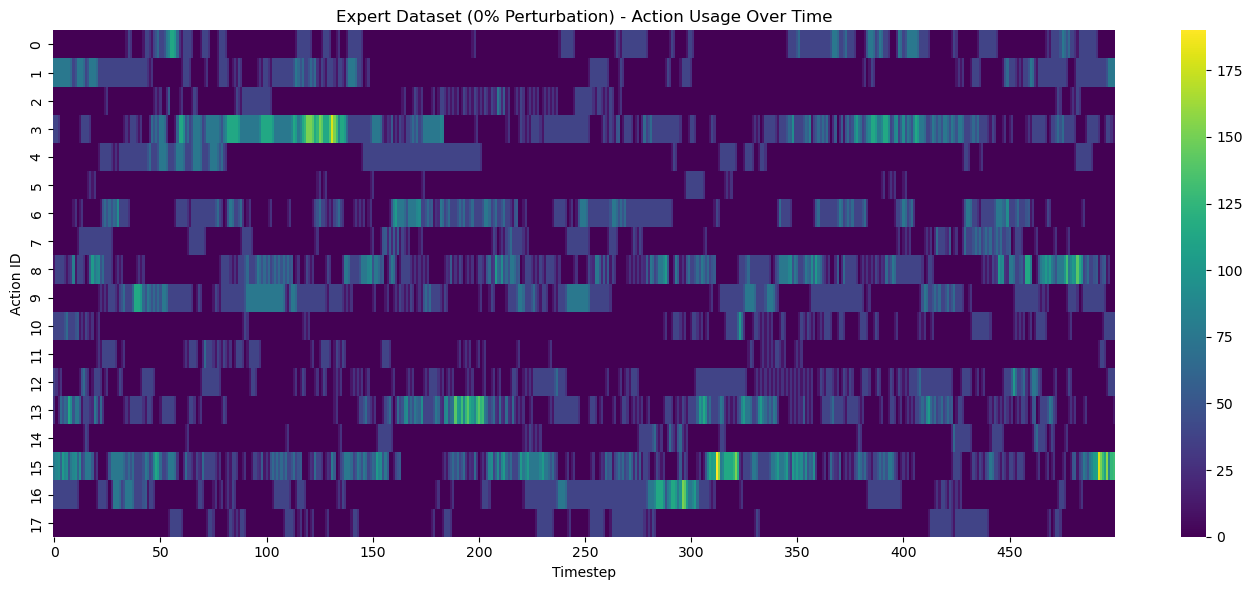

In [2]:
plot_action_usage_over_time(
    dataset_path='datasets/expert/expert_logs/plotting/expert_dataset_perturbation_0_for_plotting.pkl',
    title='Expert Dataset (0% Perturbation) - Action Usage Over Time'
)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from collections import defaultdict
from typing import List


def load_plotting_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)


# 1. Action Usage Over Time
def plot_action_usage_over_time(dataset_path: str, title: str = "Action Usage Over Time", max_steps: int = 500):
    dataset = load_plotting_dataset(dataset_path)

    time_action_counts = defaultdict(lambda: np.zeros(18, dtype=int))  # 18 Seaquest actions

    step_counter = 0
    for transition in dataset:
        if len(transition) == 6:
            _, action, _, _, done, _ = transition
        else:
            _, action, _, _, done = transition
        t = step_counter % max_steps
        time_action_counts[t][action] += 1
        step_counter += 1
        if done:
            step_counter = 0  # reset per episode

    matrix = np.stack([time_action_counts[t] for t in sorted(time_action_counts.keys())])

    plt.figure(figsize=(14, 6))
    sns.heatmap(matrix.T, cmap='viridis', xticklabels=50, yticklabels=1)
    plt.xlabel("Timestep")
    plt.ylabel("Action ID")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def plot_action_usage_over_time_split(dataset_path: str, title: str = "Action Usage Over Time (Normal vs Perturbed)", max_steps: int = 500):
    dataset = load_plotting_dataset(dataset_path)

    num_actions = 18  # Seaquest
    normal_counts = defaultdict(lambda: np.zeros(num_actions, dtype=int))
    perturbed_counts = defaultdict(lambda: np.zeros(num_actions, dtype=int))

    step_counter = 0
    for transition in dataset:
        if len(transition) == 6:
            _, action, _, _, done, perturbed = transition
        else:
            _, action, _, _, done = transition
            perturbed = False

        t = step_counter % max_steps
        if perturbed:
            perturbed_counts[t][action] += 1
        else:
            normal_counts[t][action] += 1

        step_counter += 1
        if done:
            step_counter = 0  # reset at episode end

    # Build matrices
    timesteps = sorted(set(normal_counts.keys()).union(perturbed_counts.keys()))
    normal_matrix = np.stack([normal_counts[t] for t in timesteps])
    perturbed_matrix = np.stack([perturbed_counts[t] for t in timesteps])

    # --- Plotting ---
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    sns.heatmap(normal_matrix.T, ax=axes[0], cmap='Blues', xticklabels=50, yticklabels=1)
    axes[0].set_ylabel("Action ID")
    axes[0].set_title("Normal Actions")

    sns.heatmap(perturbed_matrix.T, ax=axes[1], cmap='Reds', xticklabels=50, yticklabels=1)
    axes[1].set_xlabel("Timestep")
    axes[1].set_ylabel("Action ID")
    axes[1].set_title("Perturbed Actions")

    fig.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

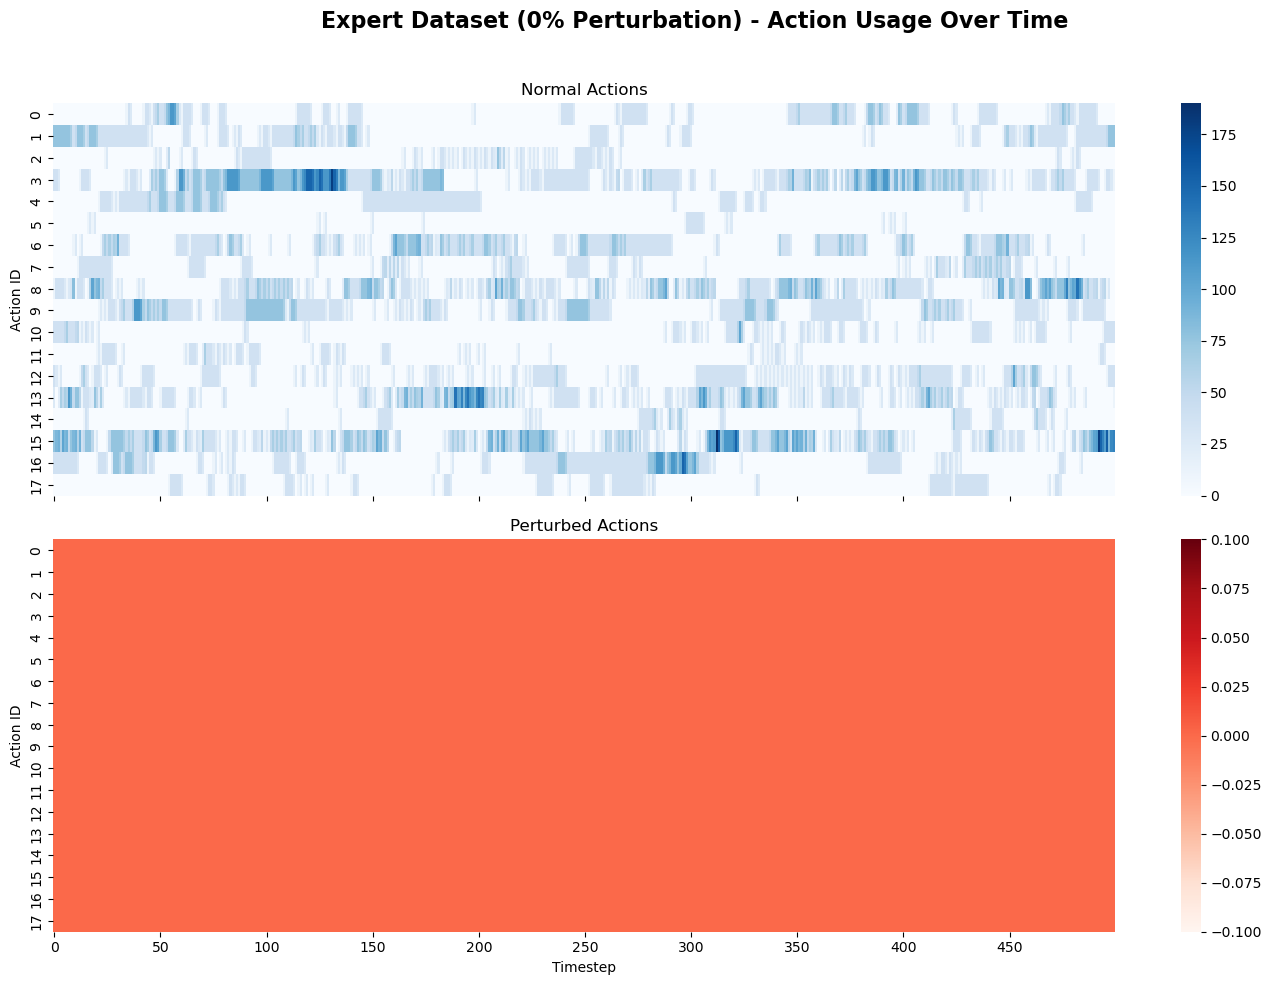

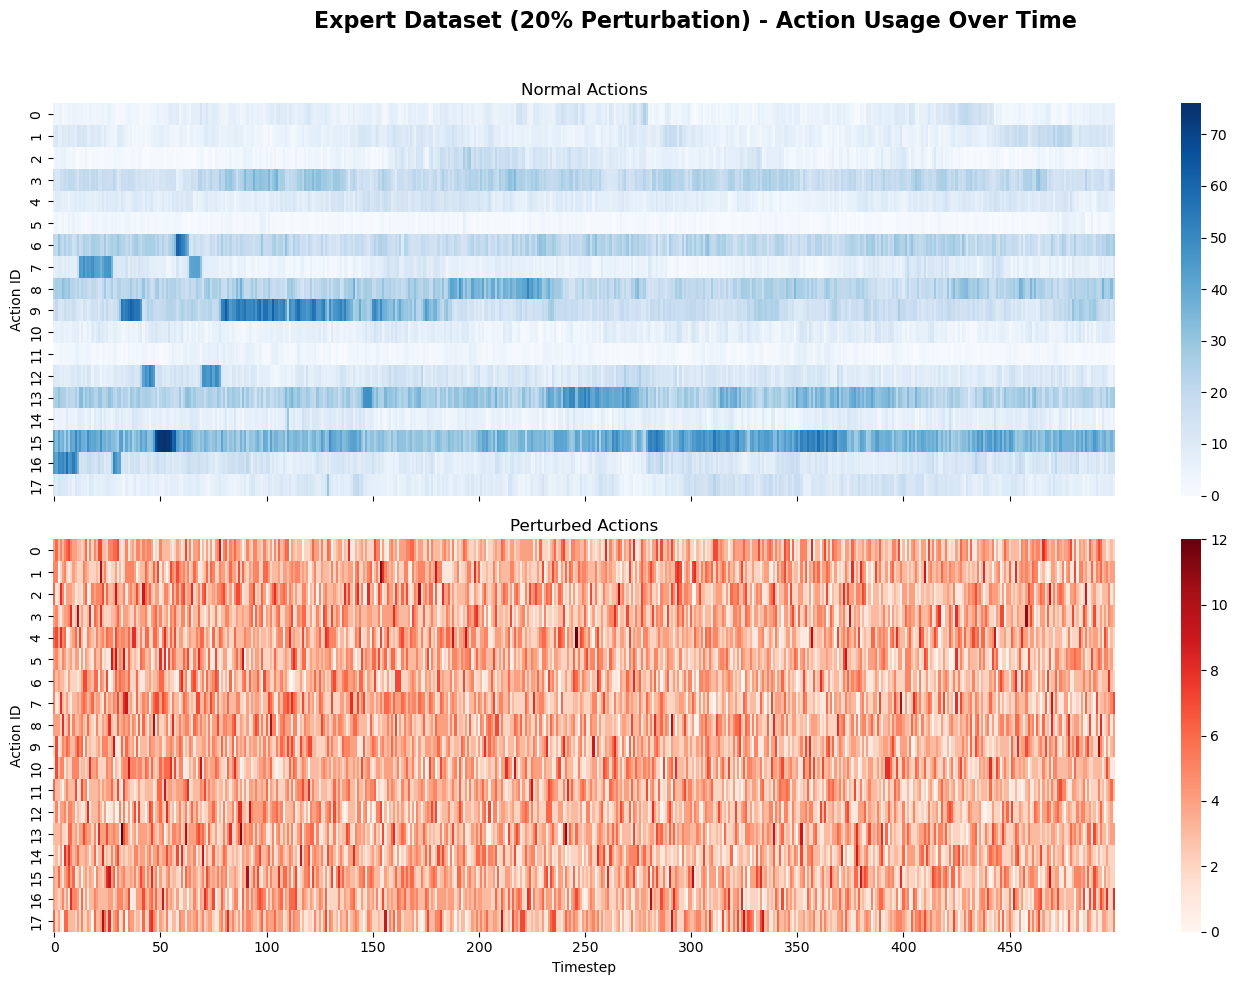

In [4]:
# --- Call the Plotting Function ---
plot_action_usage_over_time_split(
    dataset_path='datasets/expert/expert_logs/plotting/expert_dataset_perturbation_0_for_plotting.pkl',
    title='Expert Dataset (0% Perturbation) - Action Usage Over Time'
)

plot_action_usage_over_time_split(
    dataset_path='datasets/expert/expert_logs/plotting/expert_dataset_perturbation_20_for_plotting.pkl',
    title='Expert Dataset (20% Perturbation) - Action Usage Over Time'
)


In [1]:
# Re-execute after environment reset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from collections import defaultdict

def load_plotting_dataset(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# Combined grid plot for multiple datasets (normal + perturbed stacked vertically per dataset)
def plot_combined_action_usage_over_time(dataset_paths, dataset_titles, max_steps=500):
    num_actions = 18
    num_datasets = len(dataset_paths)
    
    fig, axes = plt.subplots(nrows=2, ncols=num_datasets, figsize=(7 * num_datasets, 10), sharex='col', sharey='row')
    
    for col, (path, title) in enumerate(zip(dataset_paths, dataset_titles)):
        dataset = load_plotting_dataset(path)
        normal_counts = defaultdict(lambda: np.zeros(num_actions, dtype=int))
        perturbed_counts = defaultdict(lambda: np.zeros(num_actions, dtype=int))

        step_counter = 0
        for transition in dataset:
            if len(transition) == 6:
                _, action, _, _, done, perturbed = transition
            else:
                _, action, _, _, done = transition
                perturbed = False

            t = step_counter % max_steps
            if perturbed:
                perturbed_counts[t][action] += 1
            else:
                normal_counts[t][action] += 1

            step_counter += 1
            if done:
                step_counter = 0

        timesteps = sorted(set(normal_counts.keys()).union(perturbed_counts.keys()))
        normal_matrix = np.stack([normal_counts[t] for t in timesteps])
        perturbed_matrix = np.stack([perturbed_counts[t] for t in timesteps])

        # Plot normal
        sns.heatmap(normal_matrix.T, ax=axes[0, col], cmap='Blues', xticklabels=50, yticklabels=1 if col == 0 else False)
        axes[0, col].set_title(f"{title}\nNormal Actions", fontsize=14)
        if col == 0:
            axes[0, col].set_ylabel("Action ID")

        # Plot perturbed
        sns.heatmap(perturbed_matrix.T, ax=axes[1, col], cmap='Reds', xticklabels=50, yticklabels=1 if col == 0 else False)
        axes[1, col].set_title("Perturbed Actions", fontsize=14)
        axes[1, col].set_xlabel("Timestep")
        if col == 0:
            axes[1, col].set_ylabel("Action ID")

    fig.suptitle("Action Usage Over Time - Normal vs Perturbed Across Datasets", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


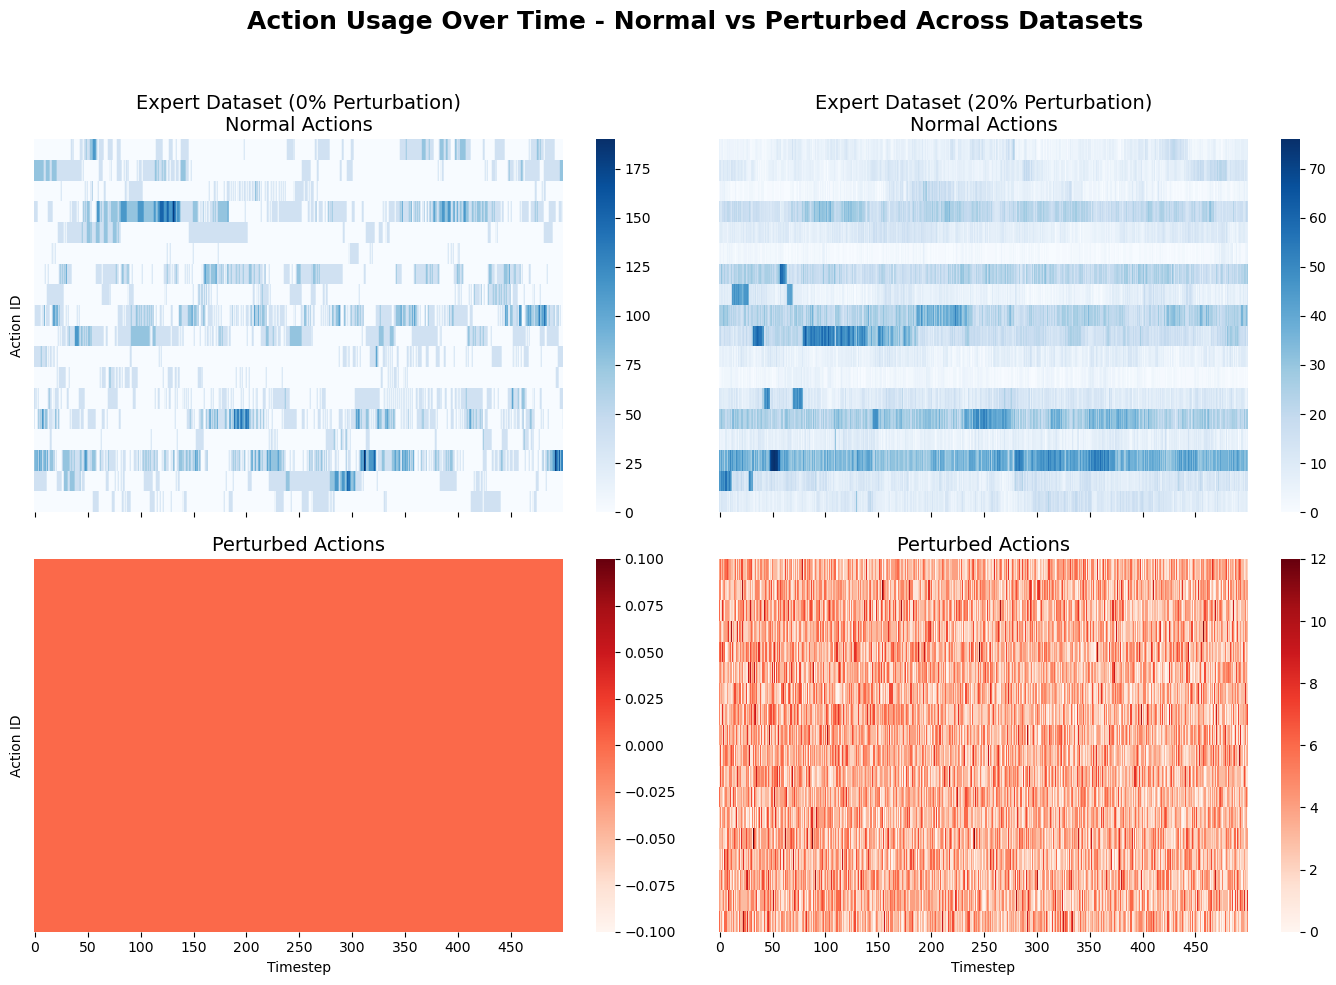

In [2]:
plot_combined_action_usage_over_time(
    dataset_paths=[
        'datasets/expert/expert_logs/plotting/expert_dataset_perturbation_0_for_plotting.pkl',
        'datasets/expert/expert_logs/plotting/expert_dataset_perturbation_20_for_plotting.pkl'
    ],
    dataset_titles=[
        'Expert Dataset (0% Perturbation)',
        'Expert Dataset (20% Perturbation)'
    ]
)


--------------------

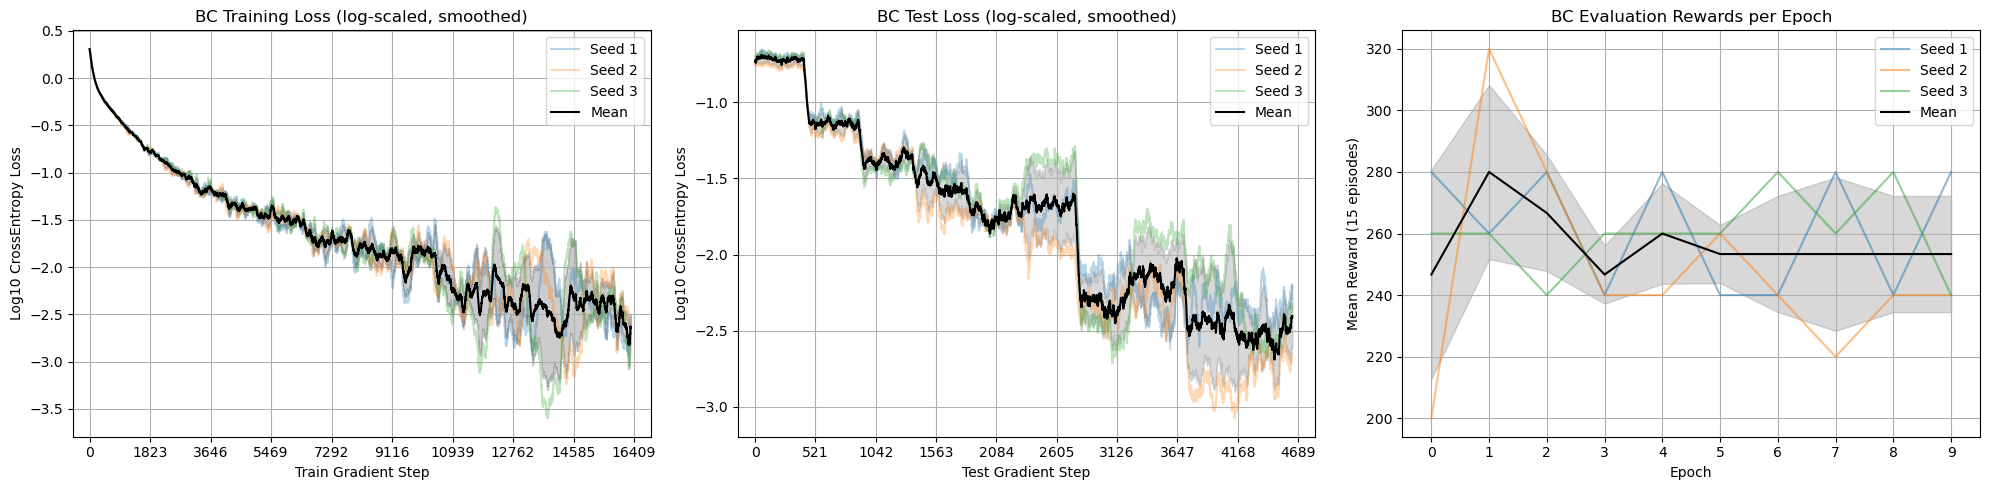

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def plot_bc_stats(stats_path, show_all_seeds=True):
    # Load stats
    with open(stats_path, "rb") as f:
        stats = pickle.load(f)

    # Unpack
    train_losses = stats["train_losses"]
    test_losses = stats["test_losses"]
    rewards = stats["rewards"]
    train_steps = stats["train_steps"]
    test_steps = stats["test_steps"]
    reward_steps = stats["reward_steps"]
    num_seeds = stats["num_seeds"]

    def moving_average(x, window=100):
        return np.convolve(x, np.ones(window) / window, mode='valid')

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))

    # === 1. Training Loss ===
    smoothed_losses = []
    min_len = min(len(l) for l in train_losses)
    for i in range(num_seeds):
        smoothed = moving_average(train_losses[i], window=100)
        smoothed_losses.append(smoothed[:min_len])
        if show_all_seeds:
            axs[0].plot(train_steps[i][:len(smoothed)], smoothed, alpha=0.3, label=f'Seed {i+1}')

    smoothed_losses = np.array(smoothed_losses)
    mean_loss = smoothed_losses.mean(axis=0)
    std_loss = smoothed_losses.std(axis=0)
    axs[0].plot(train_steps[0][:len(mean_loss)], mean_loss, color='black', label='Mean')
    axs[0].fill_between(train_steps[0][:len(mean_loss)], mean_loss - std_loss, mean_loss + std_loss, color='black', alpha=0.2)
    axs[0].set_xlim([-500, max(train_steps[0]) + 500])
    axs[0].set_xticks(np.linspace(0, max(train_steps[0]), num=10, dtype=int))
    axs[0].set_title("BC Training Loss (log-scaled, smoothed)")
    axs[0].set_xlabel("Train Gradient Step")
    axs[0].set_ylabel("Log10 CrossEntropy Loss")
    axs[0].legend()
    axs[0].grid(True)

    # === 2. Test Loss ===
    smoothed_test = []
    min_len_test = min(min(len(t), len(s)) for t, s in zip(test_losses, test_steps))
    for i in range(num_seeds):
        smoothed = moving_average(test_losses[i], window=50)
        smoothed_test.append(smoothed[:min_len_test])
        if show_all_seeds:
            axs[1].plot(test_steps[i][:len(smoothed)], smoothed, alpha=0.3, label=f'Seed {i+1}')

    smoothed_test = np.array(smoothed_test)
    mean_test = smoothed_test.mean(axis=0)
    std_test = smoothed_test.std(axis=0)
    axs[1].plot(test_steps[0][:len(mean_test)], mean_test, color='black', label='Mean')
    axs[1].fill_between(test_steps[0][:len(mean_test)], mean_test - std_test, mean_test + std_test, color='gray', alpha=0.3)
    axs[1].set_xlim([-150, max(test_steps[0]) + 150])
    axs[1].set_xticks(np.linspace(0, max(test_steps[0]), num=10, dtype=int))
    axs[1].set_title("BC Test Loss (log-scaled, smoothed)")
    axs[1].set_xlabel("Test Gradient Step")
    axs[1].set_ylabel("Log10 CrossEntropy Loss")
    axs[1].legend()
    axs[1].grid(True)

    # === 3. Reward per Epoch ===
    episodes_per_epoch = 15
    min_epochs = min(len(r) // episodes_per_epoch for r in rewards)
    epoch_rewards = []

    for r in rewards:
        grouped = [np.mean(r[i * episodes_per_epoch: (i + 1) * episodes_per_epoch]) for i in range(min_epochs)]
        epoch_rewards.append(grouped)

    epoch_rewards = np.array(epoch_rewards)
    mean_epoch_reward = epoch_rewards.mean(axis=0)
    std_epoch_reward = epoch_rewards.std(axis=0)
    epochs = list(range(min_epochs))

    for i in range(num_seeds):
        if show_all_seeds:
            axs[2].plot(epochs, epoch_rewards[i], alpha=0.5, label=f'Seed {i+1}')
    axs[2].plot(epochs, mean_epoch_reward, color='black', label='Mean')
    axs[2].fill_between(epochs, mean_epoch_reward - std_epoch_reward, mean_epoch_reward + std_epoch_reward, color='gray', alpha=0.3)
    axs[2].set_xlim([-0.5, epochs[-1] + 0.5])
    axs[2].set_xticks(range(0, epochs[-1] + 1))
    axs[2].set_title("BC Evaluation Rewards per Epoch")
    axs[2].set_xlabel("Epoch")
    axs[2].set_ylabel("Mean Reward (15 episodes)")
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

plot_bc_stats("agent_methods/behavioral_cloning_bc/bc_logs/seaquest_beginner/perturb0/stats_perturb0.pkl", show_all_seeds=True)

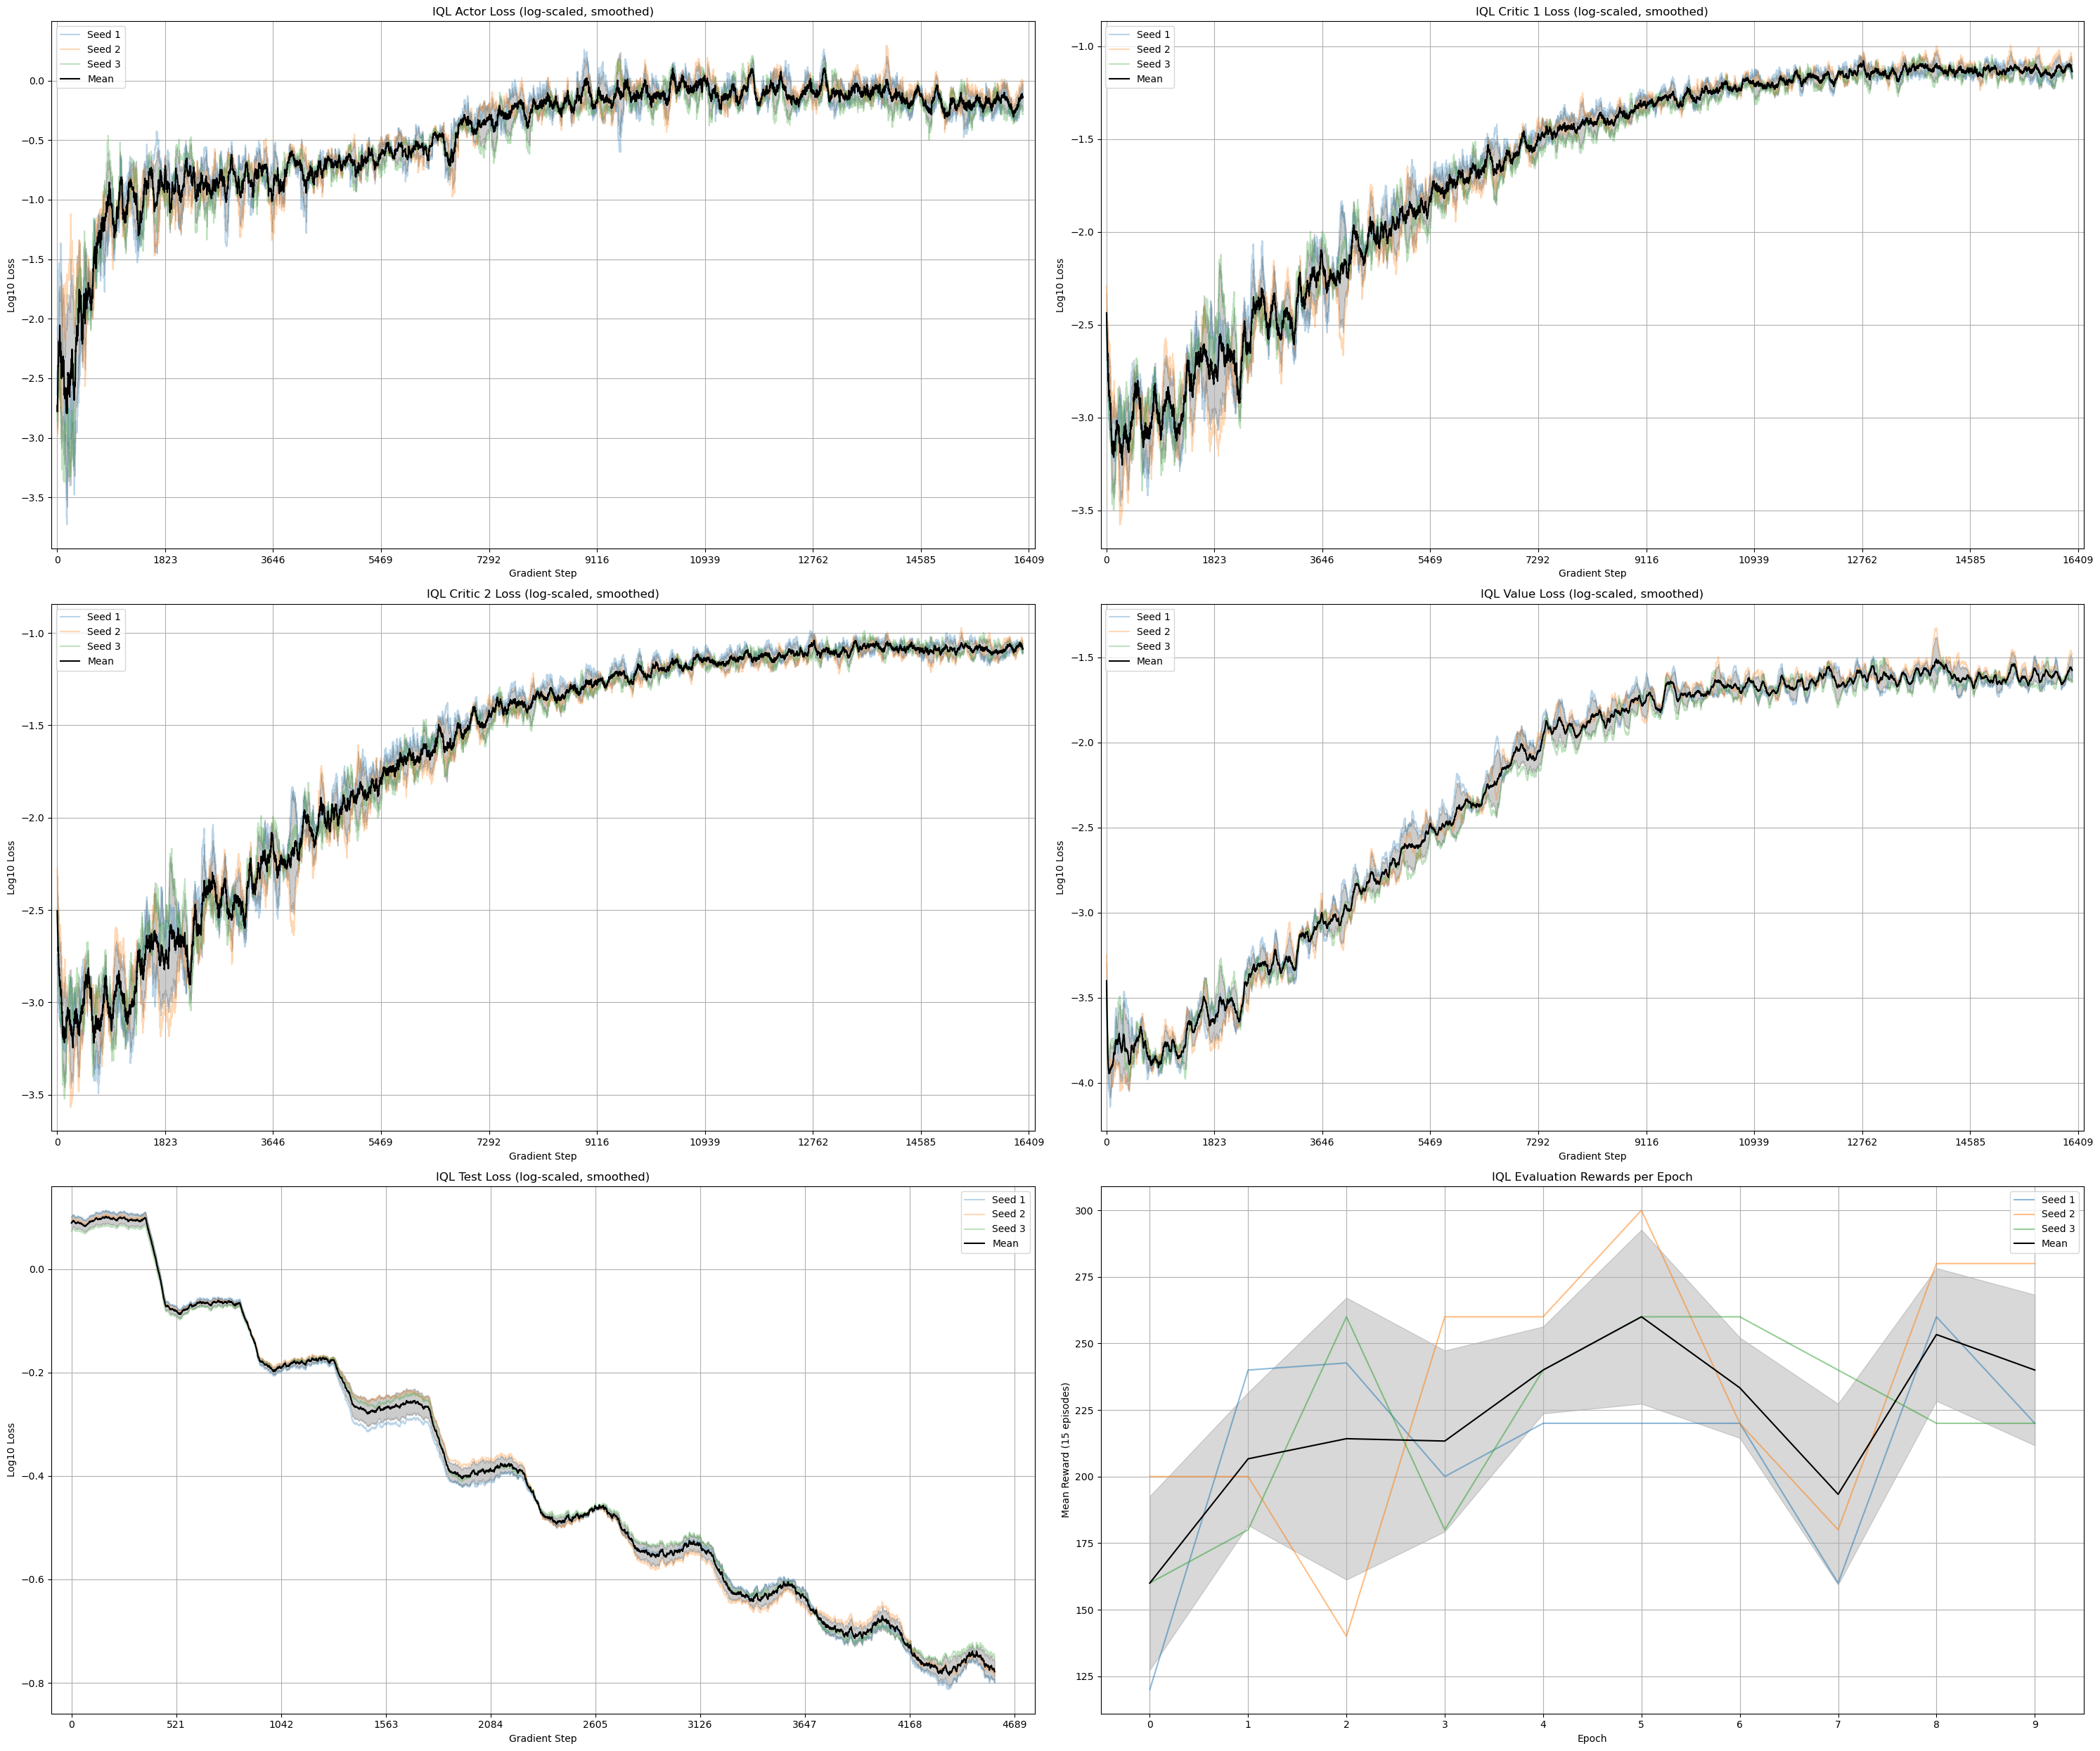

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def plot_iql_stats(stats_path, show_all_seeds=True):
    # Load stats
    with open(stats_path, "rb") as f:
        stats = pickle.load(f)

    # Unpack
    actor_losses = stats["actor_losses"]
    critic1_losses = stats["critic1_losses"]
    critic2_losses = stats["critic2_losses"]
    value_losses = stats["value_losses"]
    test_losses = stats["test_losses"]
    rewards = stats["rewards"]

    actor_steps = stats["actor_steps"]
    critic1_steps = stats["critic1_steps"]
    critic2_steps = stats["critic2_steps"]
    value_steps = stats["value_steps"]
    test_steps = stats["test_steps"]
    reward_steps = stats["reward_steps"]

    num_seeds = stats["num_seeds"]

    def moving_average(x, window=100):
        return np.convolve(x, np.ones(window) / window, mode='valid')

    fig, axs = plt.subplots(3, 2, figsize=(30, 25))

    def plot_smoothed(ax, losses, steps, label, color='black', window=100):
        smoothed = []
        min_len = min(len(l) for l in losses)
        for i in range(num_seeds):
            sm = moving_average(losses[i], window=window)
            smoothed.append(sm[:min_len])
            if show_all_seeds:
                ax.plot(steps[i][:len(sm)], sm, alpha=0.3, label=f'Seed {i+1}')
        smoothed = np.array(smoothed)
        mean = smoothed.mean(axis=0)
        std = smoothed.std(axis=0)
        ax.plot(steps[0][:len(mean)], mean, color=color, label='Mean')
        ax.fill_between(steps[0][:len(mean)], mean - std, mean + std, color=color, alpha=0.2)
        ax.set_xlim([-100, max(steps[0]) + 100])
        ax.set_xticks(np.linspace(0, max(steps[0]), num=10, dtype=int))
        ax.set_title(label)
        ax.set_xlabel("Gradient Step")
        ax.set_ylabel("Log10 Loss")
        ax.legend()
        ax.grid(True)

    plot_smoothed(axs[0, 0], actor_losses, actor_steps, "IQL Actor Loss (log-scaled, smoothed)")
    plot_smoothed(axs[0, 1], critic1_losses, critic1_steps, "IQL Critic 1 Loss (log-scaled, smoothed)")
    plot_smoothed(axs[1, 0], critic2_losses, critic2_steps, "IQL Critic 2 Loss (log-scaled, smoothed)")
    plot_smoothed(axs[1, 1], value_losses, value_steps, "IQL Value Loss (log-scaled, smoothed)")
    plot_smoothed(axs[2, 0], test_losses, test_steps, "IQL Test Loss (log-scaled, smoothed)")

    # === 6. Reward per Epoch ===
    episodes_per_epoch = 15
    min_epochs = min(len(r) // episodes_per_epoch for r in rewards)
    epoch_rewards = []

    for r in rewards:
        grouped = [np.mean(r[i * episodes_per_epoch: (i + 1) * episodes_per_epoch]) for i in range(min_epochs)]
        epoch_rewards.append(grouped)

    epoch_rewards = np.array(epoch_rewards)
    mean_epoch_reward = epoch_rewards.mean(axis=0)
    std_epoch_reward = epoch_rewards.std(axis=0)
    epochs = list(range(min_epochs))

    for i in range(num_seeds):
        if show_all_seeds:
            axs[2, 1].plot(epochs, epoch_rewards[i], alpha=0.5, label=f'Seed {i+1}')
    axs[2, 1].plot(epochs, mean_epoch_reward, color='black', label='Mean')
    axs[2, 1].fill_between(epochs, mean_epoch_reward - std_epoch_reward, mean_epoch_reward + std_epoch_reward, color='gray', alpha=0.3)
    axs[2, 1].set_xlim([-0.5, epochs[-1] + 0.5])
    axs[2, 1].set_xticks(range(0, epochs[-1] + 1))
    axs[2, 1].set_title("IQL Evaluation Rewards per Epoch")
    axs[2, 1].set_xlabel("Epoch")
    axs[2, 1].set_ylabel("Mean Reward (15 episodes)")
    axs[2, 1].legend()
    axs[2, 1].grid(True)

    plt.tight_layout()
    plt.show()

plot_iql_stats("agent_methods/implicit_q_learning_iql/iql_logs/seaquest_beginner/perturb0/stats_perturb0.pkl", show_all_seeds=True)

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

def plot_rl_model_stats(stats_path, model_name="Generic", show_all_seeds=True):
    with open(stats_path, "rb") as f:
        stats = pickle.load(f)

    num_seeds = stats["num_seeds"]
    rewards = stats["rewards"]
    reward_steps = stats["reward_steps"]

    def moving_average(x, window=100):
        return np.convolve(x, np.ones(window) / window, mode='valid')

    fig, axs = plt.subplots(2, 3, figsize=(25, 10))
    axs = axs.flatten()

    plot_idx = 0

    # === Plot any available loss metric ===
    def try_plot_loss(loss_key, step_key, title, ax, window=100):
        if loss_key in stats and step_key in stats:
            losses = stats[loss_key]
            steps = stats[step_key]
            smoothed = []
            min_len = min(len(l) for l in losses)
            for i in range(num_seeds):
                sm = moving_average(losses[i], window=window)
                smoothed.append(sm[:min_len])
                if show_all_seeds:
                    ax.plot(steps[i][:len(sm)], sm, alpha=0.3, label=f'Seed {i+1}')
            smoothed = np.array(smoothed)
            mean = smoothed.mean(axis=0)
            std = smoothed.std(axis=0)
            ax.plot(steps[0][:len(mean)], mean, color='black', label='Mean')
            ax.fill_between(steps[0][:len(mean)], mean - std, mean + std, color='black', alpha=0.2)
            ax.set_xlim([-100, max(steps[0]) + 100])
            ax.set_xticks(np.linspace(0, max(steps[0]), num=10, dtype=int))
            ax.set_title(f"{model_name} {title} (log-scaled, smoothed)")
            ax.set_xlabel("Gradient Step")
            ax.set_ylabel("Log10 Loss")
            ax.legend()
            ax.grid(True)
            return True
        return False

    loss_mappings = [
        ("train_losses", "train_steps", "Train Loss"),
        ("test_losses", "test_steps", "Test Loss"),
        ("tune_losses", "tune_steps", "Tune Loss"),
        ("actor_losses", "actor_steps", "Actor Loss"),
        ("critic1_losses", "critic1_steps", "Critic 1 Loss"),
        ("critic2_losses", "critic2_steps", "Critic 2 Loss"),
        ("value_losses", "value_steps", "Value Loss"),
    ]

    for loss_key, step_key, title in loss_mappings:
        if plot_idx < len(axs):
            plotted = try_plot_loss(loss_key, step_key, title, axs[plot_idx])
            if plotted:
                plot_idx += 1

    # === Reward per Epoch (assumes 15 episodes per epoch) ===
    episodes_per_epoch = 15
    min_epochs = min(len(r) // episodes_per_epoch for r in rewards)
    epoch_rewards = []

    for r in rewards:
        grouped = [np.mean(r[i * episodes_per_epoch: (i + 1) * episodes_per_epoch]) for i in range(min_epochs)]
        epoch_rewards.append(grouped)

    epoch_rewards = np.array(epoch_rewards)
    mean_epoch_reward = epoch_rewards.mean(axis=0)
    std_epoch_reward = epoch_rewards.std(axis=0)
    epochs = list(range(min_epochs))

    reward_ax = axs[plot_idx] if plot_idx < len(axs) else axs[-1]
    for i in range(num_seeds):
        if show_all_seeds:
            reward_ax.plot(epochs, epoch_rewards[i], alpha=0.5, label=f'Seed {i+1}')
    reward_ax.plot(epochs, mean_epoch_reward, color='black', label='Mean')
    reward_ax.fill_between(epochs, mean_epoch_reward - std_epoch_reward, mean_epoch_reward + std_epoch_reward, color='gray', alpha=0.3)
    reward_ax.set_xlim([-0.5, epochs[-1] + 0.5])
    reward_ax.set_xticks(range(0, epochs[-1] + 1))
    reward_ax.set_title(f"{model_name} Evaluation Rewards per Epoch")
    reward_ax.set_xlabel("Epoch")
    reward_ax.set_ylabel("Mean Reward (15 episodes)")
    reward_ax.legend()
    reward_ax.grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
plot_rl_model_stats("path/to/bc_stats.pkl", model_name="BC")
plot_rl_model_stats("path/to/iql_stats.pkl", model_name="IQL")
plot_rl_model_stats("path/to/bve_stats.pkl", model_name="BVE")